In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
df = pd.read_csv("C:/Users/Harsh Kumar/Downloads/laptop_data.csv")
df.drop(['Unnamed: 0'],axis = 1,inplace  =True)
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200



## project thora difficult hai -->> bahot kuch sikhenge...

### DATA PREPROCESSING

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


only inches,price are numerical data ..rest are categorical data..
we have to remove kg from weight 

In [84]:
df.shape

(1303, 11)

### removing kg from weight

In [125]:
df = df.replace({
    'Weight': '[A-Za-z]',
    'Ram' : '[A-Za-z]' 
    
},'',regex = True)
#  using regex and replace ..
df['Weight'] = df['Weight'].astype(np.float32)
df['Ram'] = df['Ram'].astype(np.int32)

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


#### checking for duplicated rows and removing them 

In [126]:
df.duplicated().sum()

29

In [127]:
df = df.drop_duplicates()

In [128]:
df.duplicated().sum()

0

### At first I will try to find out information about the columns

In [7]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


# EDA -->> UNIVARIATE THEN BIVARIATE ANALYSIS

### univariate analysis on Price column

In [24]:
df['Price'].describe()

count      1274.000000
mean      60503.185074
std       37333.222977
min        9270.720000
25%       32495.605200
50%       52693.920000
75%       79773.480000
max      324954.720000
Name: Price, dtype: float64

F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Count'>

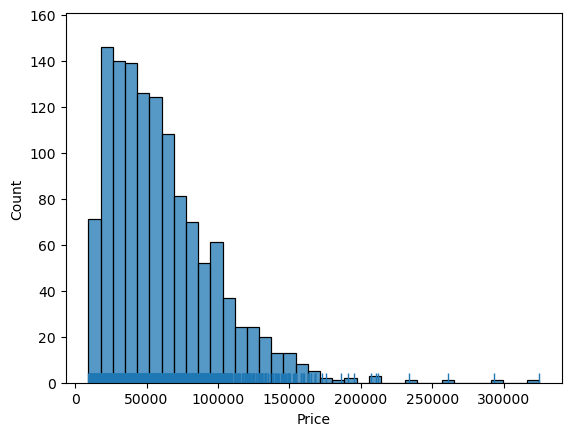

In [13]:
sns.histplot(df['Price'])
sns.rugplot(df['Price'])

F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

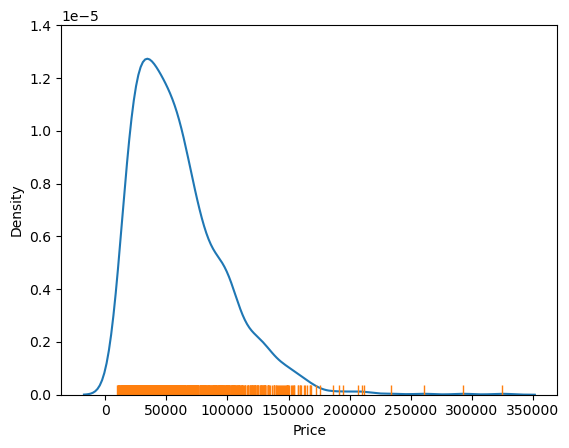

In [14]:
sns.kdeplot(df['Price'])
#  right skewed.. thin tail..we will need to transform the data similar to normal distribution
sns.rugplot(df['Price'])

Text(0, 0.5, 'prices')

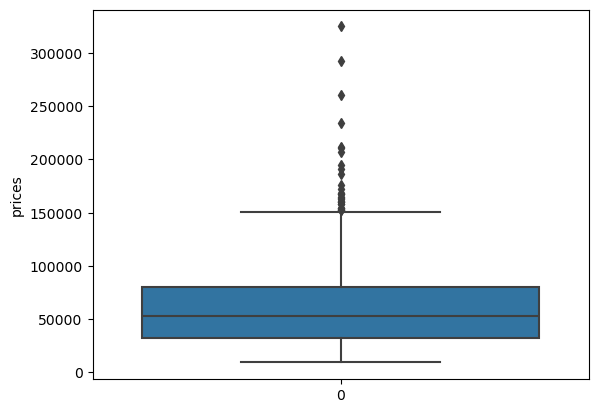

In [15]:
sns.boxplot(df['Price'])
plt.ylabel('prices')

In [16]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


### df['Company']  -->> categorical data

F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Company', ylabel='Count'>

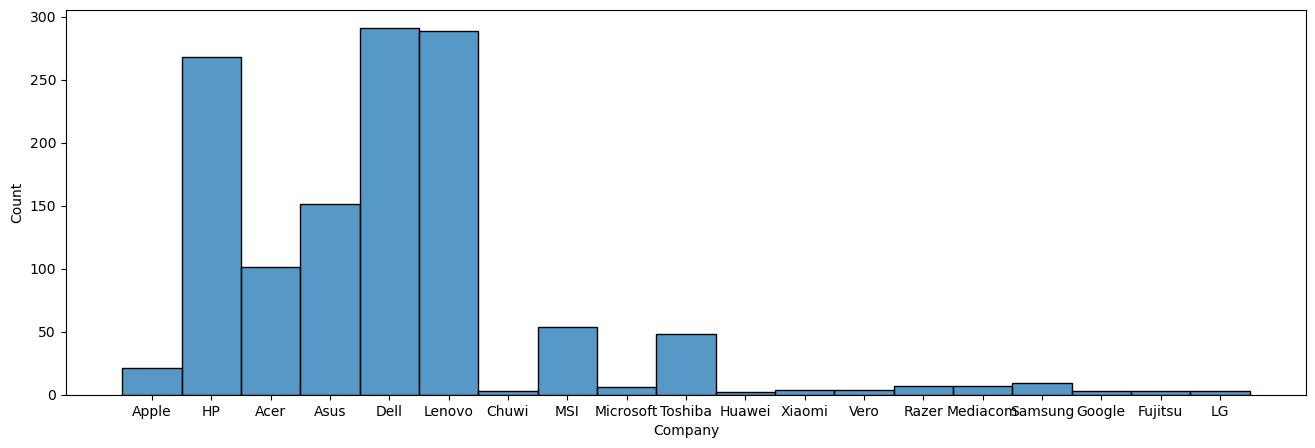

In [17]:
fig ,ax = plt.subplots(figsize = (16,5))
sns.histplot(df['Company'],ax = ax)


<Axes: xlabel='Company'>

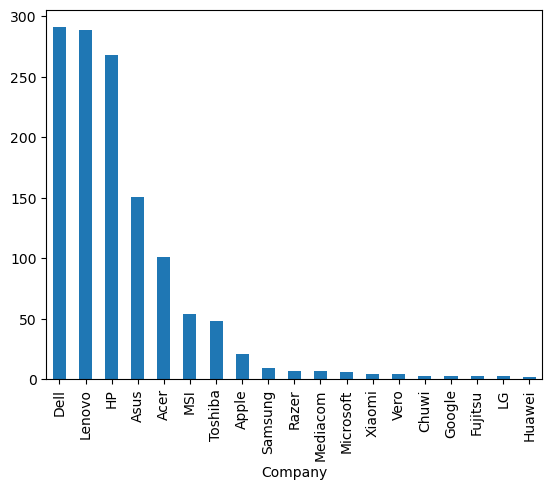

In [18]:
df['Company'].value_counts().plot(kind = 'bar')

### company share in laptop market in terms of count 
we can create piechart to understand the market share of company in laptops..

In [19]:
vals = df['Company'].value_counts()
vals

Company
Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [20]:
company = vals.index
company

Index(['Dell', 'Lenovo', 'HP', 'Asus', 'Acer', 'MSI', 'Toshiba', 'Apple',
       'Samsung', 'Razer', 'Mediacom', 'Microsoft', 'Xiaomi', 'Vero', 'Chuwi',
       'Google', 'Fujitsu', 'LG', 'Huawei'],
      dtype='object', name='Company')

Text(0.5, 1.0, 'laptop mkt share (count)')

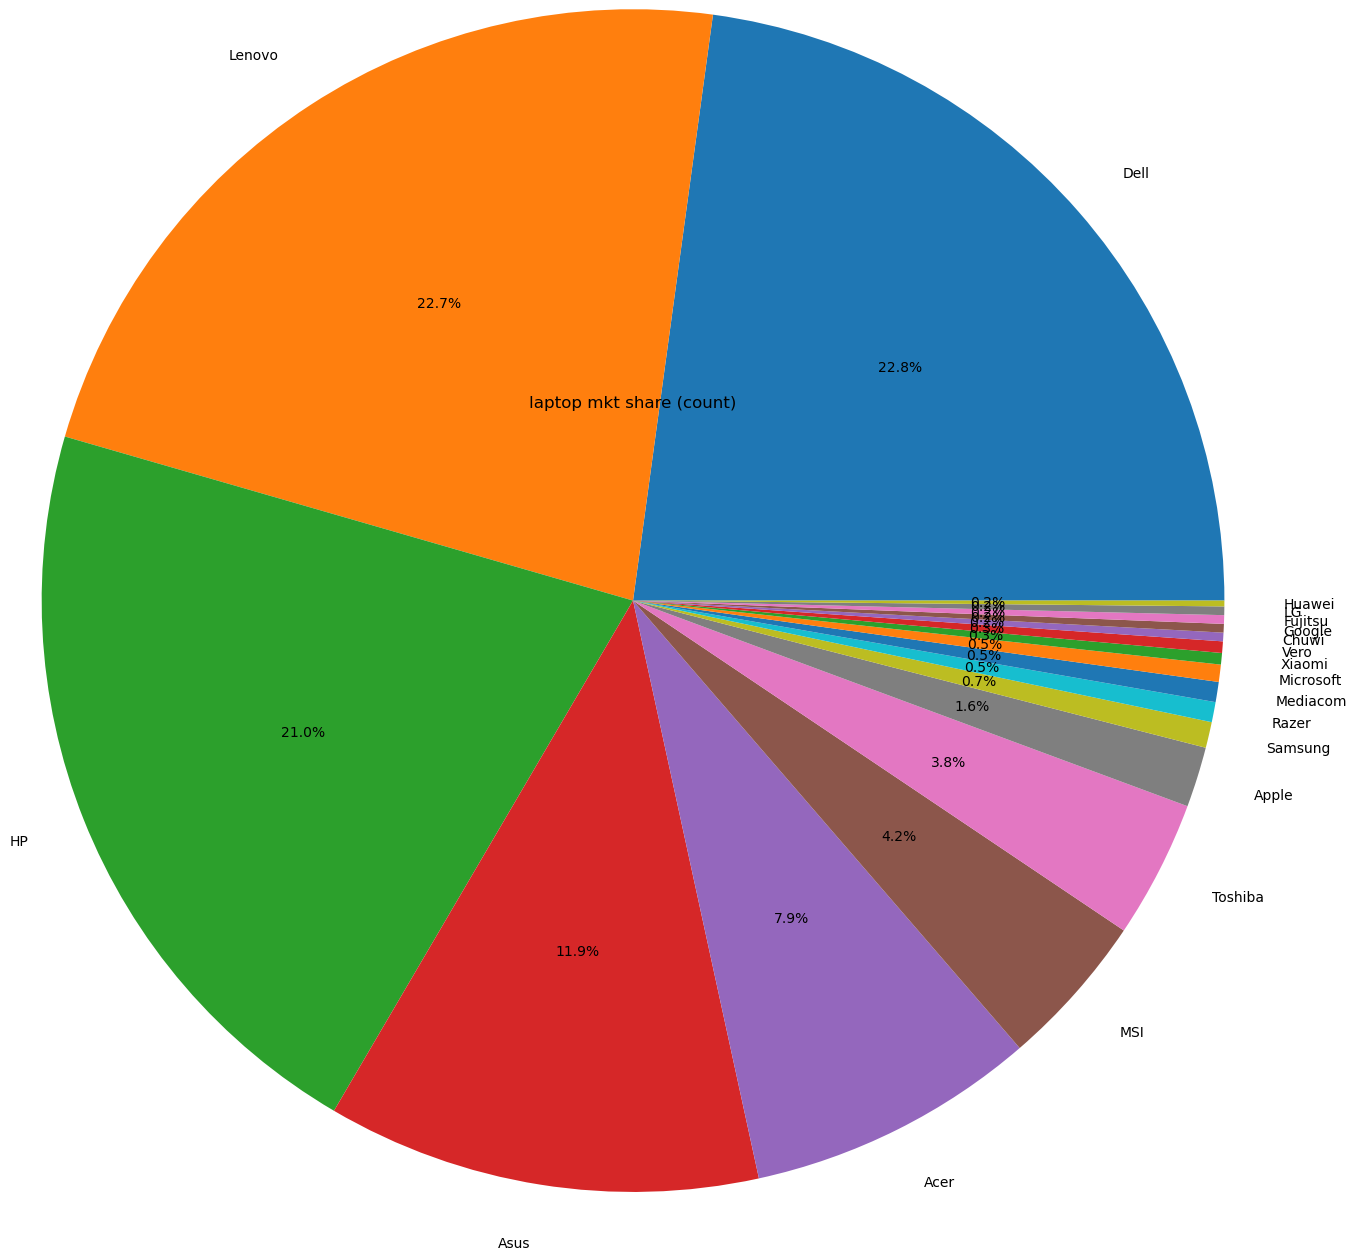

In [21]:
plt.pie(vals.values,labels = company,radius  = 4,autopct = "%0.1f%%")
plt.title("laptop mkt share (count)")

### price of laoptop and company

In [157]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


## lets consider the dataset a market

F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


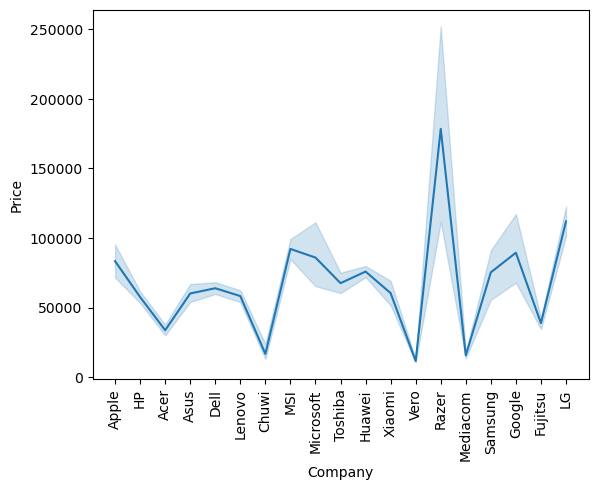

In [24]:
sns.lineplot(data = df, x = 'Company',y = 'Price')
plt.xticks(rotation = 'vertical')
plt.show()

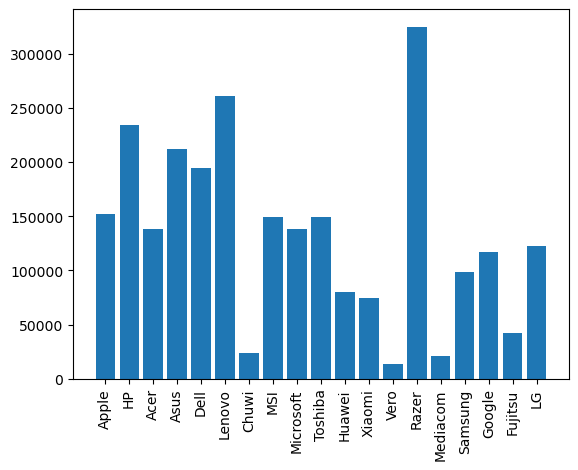

In [25]:
plt.bar(df['Company'],df['Price'])
plt.xticks(rotation = 90)
plt.show()

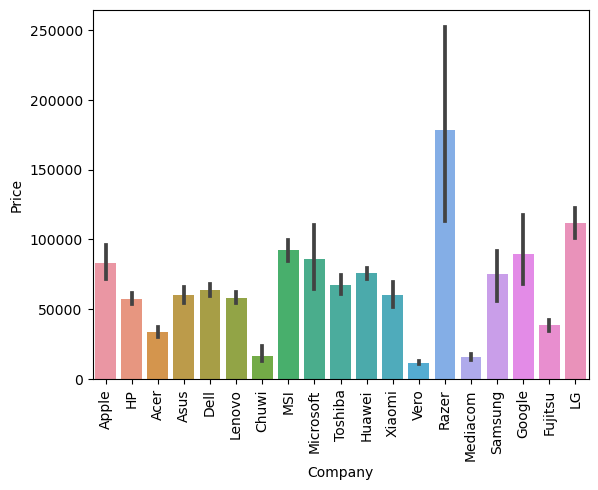

In [26]:
sns.barplot(data = df,x = df['Company'], y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

### ticks
just for information

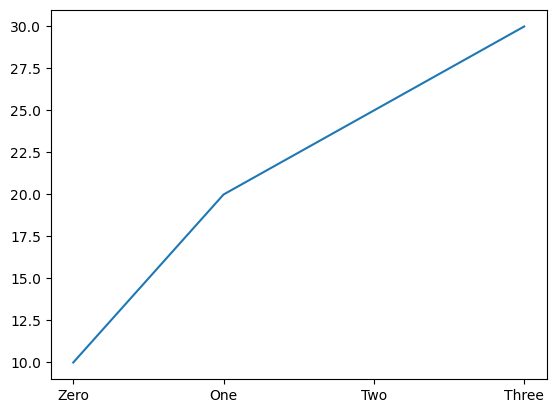

In [27]:
import matplotlib.pyplot as plt

# Example plot
plt.plot([0, 1, 2, 3], [10, 20, 25, 30])

# Set tick locations and labels
plt.xticks([0, 1, 2, 3], ['Zero', 'One', 'Two', 'Three'], rotation=360)

plt.show()

### I have tried to analyse the dataset by asking myself problem statements...

## let's work on --typename 

## the problem statement-- think ,use logic

### 1) Q) Create a dataframe that consists of categories in TypeName and no of laptops in each category


In [28]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [7]:
df[df['Company']=="Dell"]['TypeName'].unique()

array(['Notebook', 'Ultrabook', '2 in 1 Convertible', 'Gaming',
       'Workstation', 'Netbook'], dtype=object)

### i need to create a new dataframe to store 'company' and 'categories in TypeName' as two cols

#### what if i use loop .. but there are large no of datapoints ..-->> high  computation 

### lets create a program that will do it automatically with low computation...  -->> still left to be done...

In [7]:
categories_typename = ['Notebook', 'Ultrabook', '2 in 1 Convertible', 'Gaming','Workstation', 'Netbook']

In [159]:
type(categories_typename)

list

In [90]:
(df[df['Company']=="Dell"]['TypeName'] == 'Notebook')

13       True
16       True
19      False
23      False
25       True
        ...  
1254     True
1257     True
1262     True
1264     True
1267     True
Name: TypeName, Length: 291, dtype: bool

In [33]:
(df[df['Company']=="Dell"]['TypeName'] == 'Notebook').sum()
# 159 laptop are of dell company and of category Notebook

159

In [34]:
(df[df['Company']=="Dell"]['TypeName'] == 'UltraBook').sum()

0

In [35]:
(df[df['Company']=="Dell"]['TypeName'] == '2 in 1 Convertible').sum()

30

In [36]:
(df[df['Company']=="Dell"]['TypeName'] == 'Gaming').sum()

40

In [37]:
(df[df['Company']=="Dell"]['TypeName'] == 'Workstation').sum()

11

In [38]:
(df[df['Company']=="Dell"]['TypeName'] == 'Netbook').sum()

2

In [8]:
company_category_df = pd.DataFrame(columns = ['Company','Notebook', 'Ultrabook', '2 in 1 Convertible', 'Gaming','Workstation', 'Netbook'])
company_category_df

,Company,Notebook,Ultrabook,2 in 1 Convertible,Gaming,Workstation,Netbook


### I need to add rows in the empty dataframe

In [9]:
row_no = 0
for brand in df['Company'].unique():
    # we don't need  many rows need only unique ones
    company_category_df = pd.concat([company_category_df,pd.DataFrame({'Company':[brand]})],ignore_index = True)
    for cat in categories_typename:
        company_category_df.loc[row_no,cat] = (df[df['Company'] == brand]['TypeName'] == cat).sum()
    row_no += 1
    # df = pd.concat([df, pd.DataFrame({'Company': [company]})], ignore_index=True)

#### I need to optimise this code .. I  will do it later ....

#### Below is a dataframe containing laptop categories and their laptops quantity

In [10]:
company_category_df

,Company,Notebook,Ultrabook,2 in 1 Convertible,Gaming,Workstation,Netbook
0,Apple,0,21,0,0,0,0
1,HP,180,36,19,12,14,7
2,Acer,76,4,8,8,0,5
3,Asus,62,18,13,54,0,4
4,Dell,159,49,30,40,11,2
5,Lenovo,174,31,44,32,4,4
6,Chuwi,3,0,0,0,0,0
7,MSI,0,0,0,54,0,0
8,Microsoft,0,6,0,0,0,0
9,Toshiba,36,12,0,0,0,0


### Now,TypeName vs (price or quantity ) anlysis

In [55]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


<Axes: xlabel='TypeName'>

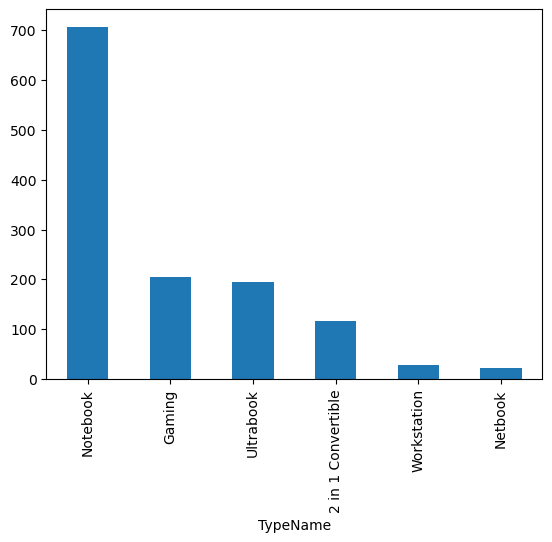

In [98]:
df['TypeName'].value_counts().plot(kind = 'bar')

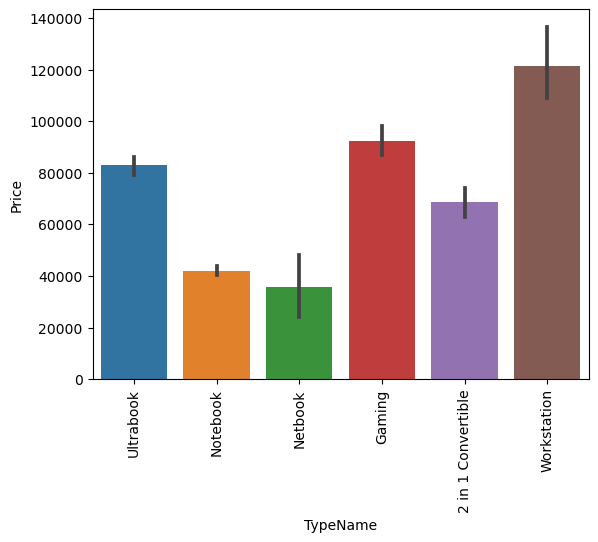

In [9]:
sns.barplot(data = df ,x = df['TypeName'],y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [106]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [160]:
categories_typename

['Notebook',
 'Ultrabook',
 '2 in 1 Convertible',
 'Gaming',
 'Workstation',
 'Netbook']

## compare b/w most expensive laptop and typename

In [118]:
df[df['TypeName'] == 'Notebook']['Price'].max()

261018.72

In [119]:
df[df['TypeName'] == 'Ultrabook']['Price'].max()

165168.0

In [139]:
type(values_max_price)

list

In [162]:
values_max_price = []
for laptop_type in categories_typename:
    values_max_price.append(df[df['TypeName'] == laptop_type]['Price'].max())


In [171]:
values_max_price

[261018.72, 165168.0, 150462.72, 324954.72, 233845.92, 101658.24]

In [172]:
categories_typename

['Notebook',
 'Ultrabook',
 '2 in 1 Convertible',
 'Gaming',
 'Workstation',
 'Netbook']

F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


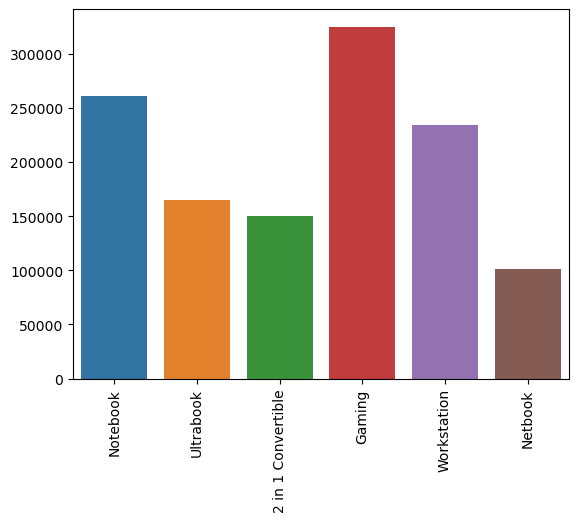

In [173]:
sns.barplot(data = df ,x = categories_typename,y = values_max_price)
plt.xticks(rotation = 'vertical')
plt.show()

## Comparison b/w min prices of all TypeName

In [174]:
categories_typename

['Notebook',
 'Ultrabook',
 '2 in 1 Convertible',
 'Gaming',
 'Workstation',
 'Netbook']

In [175]:
values_min_price = []

In [176]:
for category in categories_typename:
    values_min_price.append(df[df['TypeName'] == category]['Price'].min())

F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


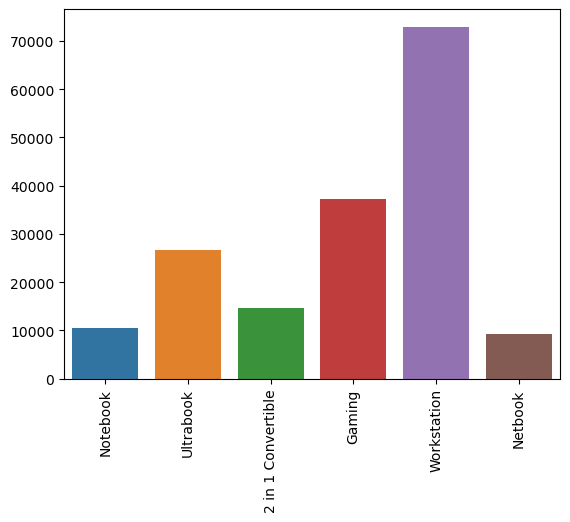

In [177]:
sns.barplot(data = df , x = categories_typename,y = values_min_price)
plt.xticks(rotation = 'vertical')
plt.show()

In [93]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


### working on Inches 

<Figure size 1200x700 with 0 Axes>

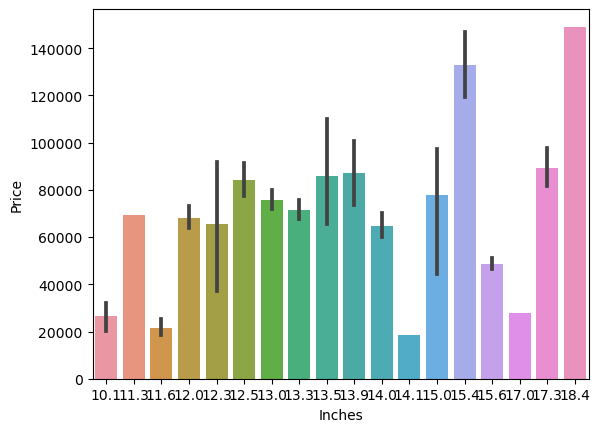

<Figure size 1200x700 with 0 Axes>

In [10]:
sns.barplot(data = df, x = df['Inches'],y =df['Price'])
plt.figure(figsize = (12,7))

F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Inches', ylabel='Count'>

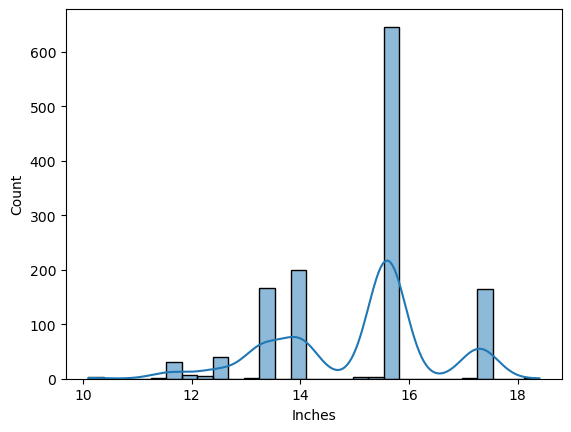

In [26]:
sns.histplot(df['Inches'],kde = True)

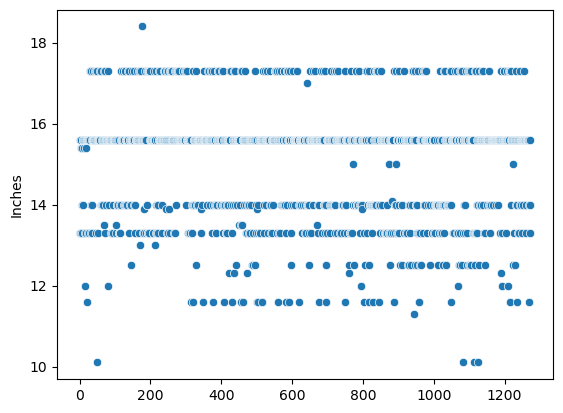

<Figure size 1200x700 with 0 Axes>

In [31]:
sns.scatterplot(df['Inches'])
plt.figure(figsize = (12,7))
plt.show()

### I couldn't figured it out... I will try again..

#### which category of TypeName has max inches like something

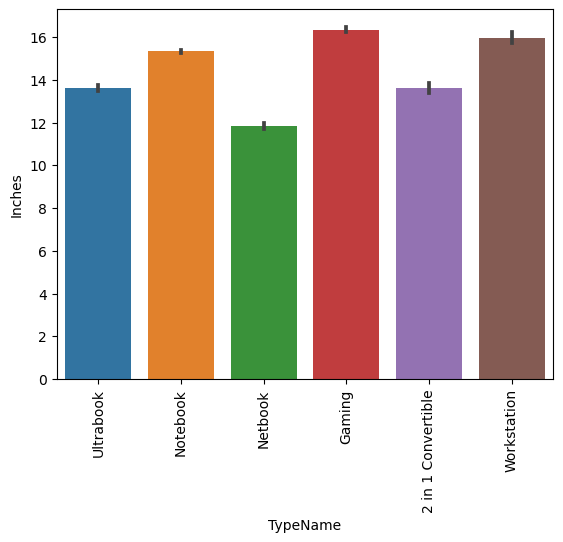

In [14]:
sns.barplot(data = df,x = df['TypeName'],y = df['Inches'])
plt.xticks(rotation = 'vertical')
plt.show()

### temporary focus on one company

In [17]:
df[df['TypeName'] == 'Notebook']['Inches'].unique()

array([15.6, 17.3, 14. , 13.3, 11.6, 12.3, 17. , 14.1])

In [18]:
for_note = df[df['TypeName'] == 'Notebook']['Inches']
for_note

2       15.6
5       15.6
10      15.6
11      15.6
13      15.6
        ... 
1266    15.6
1267    15.6
1269    15.6
1272    14.0
1273    15.6
Name: Inches, Length: 706, dtype: float64

### lets check price relation now

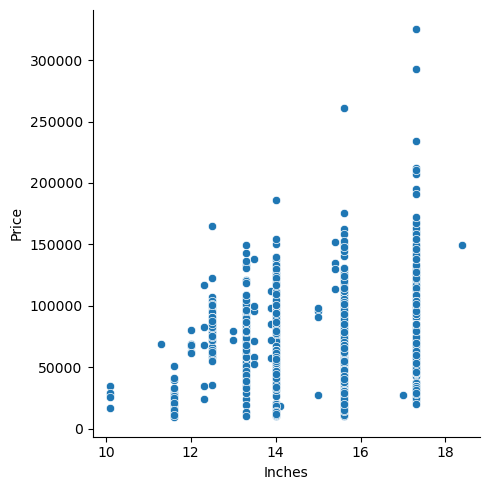

In [35]:
sns.relplot(data = df,x =df['Inches'],y = df['Price'],kind = 'scatter')

#### not so good relation 

### working on 'ScreenResolution'
-->> categorical column .. will think of finding categories then think of  encoding the categories into numbers ..

In [94]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [23]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscr

### there are too many categories ..encoding would create too many columns.. so upto 47 we will create separate cols for each ..but for rest of them should be grouped into others
not done yet..
### I had thought about doing OneHotEncoding but later I found that i didn't need to that..

In [43]:
df[df['Company'] == 'Apple']['ScreenResolution'].value_counts()

ScreenResolution
IPS Panel Retina Display 2560x1600    6
IPS Panel Retina Display 2304x1440    6
1440x900                              4
IPS Panel Retina Display 2880x1800    4
1366x768                              1
Name: count, dtype: int64

### need to plot price vs 'ScreenResolution' of apple

In [44]:
df[df['Company'] == 'Apple']['ScreenResolution']

0       IPS Panel Retina Display 2560x1600
1                                 1440x900
3       IPS Panel Retina Display 2880x1800
4       IPS Panel Retina Display 2560x1600
6       IPS Panel Retina Display 2880x1800
7                                 1440x900
12      IPS Panel Retina Display 2880x1800
14      IPS Panel Retina Display 2304x1440
15      IPS Panel Retina Display 2560x1600
17      IPS Panel Retina Display 2880x1800
26                                1440x900
34                                1440x900
45      IPS Panel Retina Display 2560x1600
81      IPS Panel Retina Display 2304x1440
249     IPS Panel Retina Display 2560x1600
270     IPS Panel Retina Display 2560x1600
794     IPS Panel Retina Display 2304x1440
1069    IPS Panel Retina Display 2304x1440
1193    IPS Panel Retina Display 2304x1440
1210    IPS Panel Retina Display 2304x1440
1234                              1366x768
Name: ScreenResolution, dtype: object

In [53]:
df[df['Company'] =='Apple']['Price'].max()

#  Now I want to know which screen resolution was it to ..cross verify

152274.24

In [54]:
df[df['Price'] == 152274.24]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
17,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.9GHz,16,512GB SSD,AMD Radeon Pro 560,macOS,1.83,152274.24


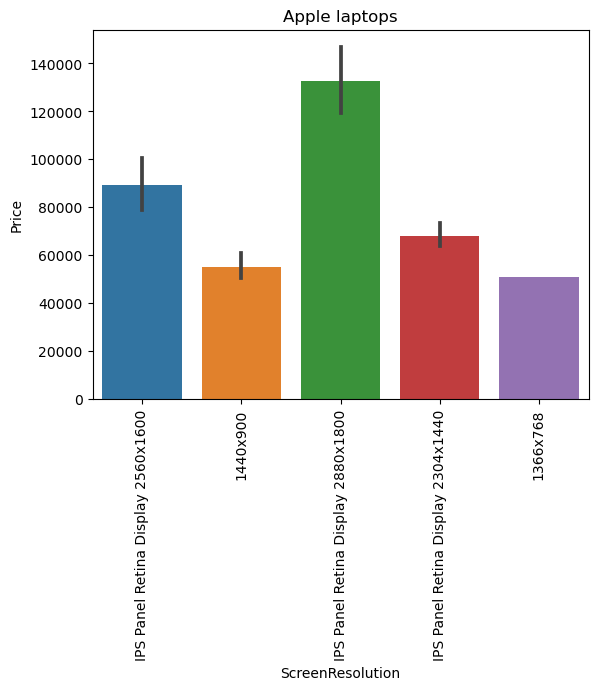

In [48]:
sns.barplot(data = df,x = df[df['Company'] == 'Apple']['ScreenResolution'],y = df[df['Company'] == 'Apple']['Price'])
plt.xticks(rotation = 'vertical')
plt.title("Apple laptops")
plt.show()

### lets check relation b/w inches and screen resolution
<br> we have to be very specific 

Apple -->>

Text(0.5, 1.0, 'Apple-Inches vs Screen resolution')

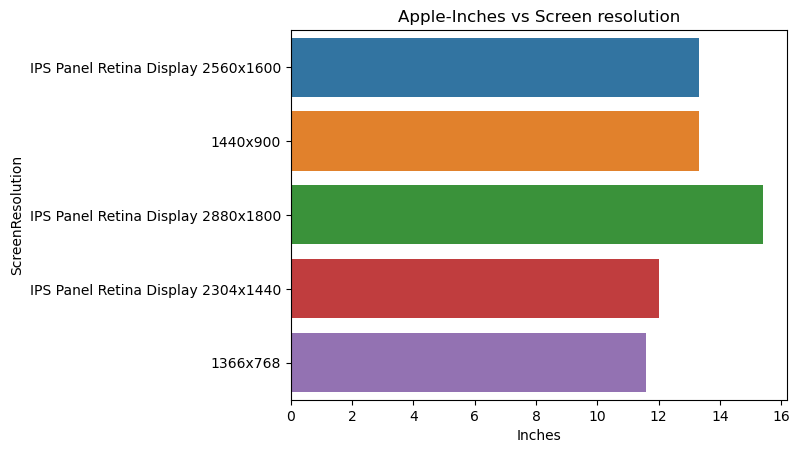

In [51]:
sns.barplot(data = df,x = df[df['Company'] == 'Apple']['Inches'],y = df[df['Company'] == 'Apple']['ScreenResolution'])
plt.title('Apple-Inches vs Screen resolution')

### lets draw few conlusions from both Apple graphs-->>
1)  IPS Panel Retina Display 2880x1800 -->> most expensive of all other laptops (correct),largest inch
2)  '1440x900' and  IPS Panel Retina Display 2560x160 have same value of inch  but 'IPS Panel Retina Display 2560x1600 ' is more expensive...
0


### lets work on DELL

In [24]:
df[df['Company']=='Dell']['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                130
1366x768                                          59
IPS Panel Full HD 1920x1080                       25
Full HD / Touchscreen 1920x1080                   24
Quad HD+ / Touchscreen 3200x1800                  12
IPS Panel Full HD / Touchscreen 1920x1080         10
4K Ultra HD / Touchscreen 3840x2160                6
Touchscreen 1366x768                               5
4K Ultra HD 3840x2160                              5
IPS Panel 4K Ultra HD 3840x2160                    4
IPS Panel 4K Ultra HD / Touchscreen 3840x2160      3
IPS Panel Touchscreen / 4K Ultra HD 3840x2160      2
Touchscreen / Quad HD+ 3200x1800                   1
IPS Panel 2560x1440                                1
2560x1440                                          1
1600x900                                           1
Quad HD+ 3200x1800                                 1
Touchscreen 2560x1440                              1
Name: count, dtype: int64

### touch screen laptop are costly

In [95]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
669,Acer,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,128GB SSD,Intel HD Graphics 520,Linux,2.1,21951.360
1112,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,2.1,22857.120
695,Acer,Netbook,11.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,32GB Flash Storage,Intel HD Graphics,Windows 10,1.4,14332.320
192,Xiaomi,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Nvidia GeForce MX150,No OS,1.3,53274.672
567,Fujitsu,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.2,39373.920


In [33]:
df.shape

(1274, 12)

In [54]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


#### I had created a col for touchscreen containing NA values so that later I could modify it and replace NA values by 1 and 0 for touchscreen..
#### i have revised the code .. i don't it is a good idea to create  a series containing na values and then changing it.. I should create a new col and add directly the new values..while creating new features...

In [35]:
# i = 0
# for row_element in df['ScreenResolution'].values:
#     if 'Touchscreen' in row_element:
#         df.loc[i,'touchscreen'] = np.int32(1)
#     else:
#         df.loc[i,'touchscreen'] = np.int32(0)  
#     i = i + 1



### I should have used apply/map and lambda function for better computation

#### lambda is better i think

In [129]:
df['touchscreen'] = df['ScreenResolution'].map(lambda row: 1 if 'Touchscreen' in row else 0 )

In [130]:
df['touchscreen']

0       0
1       0
2       0
3       0
4       0
       ..
1269    0
1270    1
1271    1
1272    0
1273    0
Name: touchscreen, Length: 1274, dtype: int64

In [131]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen
383,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.50,58554.7200,0
1177,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,512GB SSD,Nvidia GeForce GTX 960,Windows 10,3.31,69530.4000,0
834,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7300U 2.6GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.32,87912.0000,0
519,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX1050 Ti,Windows 10,3.00,80133.1200,0
522,Dell,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7300U 2.6GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.64,68184.0144,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float32
 10  Price             1274 non-null   float64
 11  touchscreen       1274 non-null   float64
dtypes: float32(1), float64(3), int32(1), object(7)
memory usage: 151.7+ KB


In [58]:
df['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [58]:
df['touchscreen'].value_counts()

touchscreen
0    1086
1     188
Name: count, dtype: int64

In [34]:
if 'Touchscreen' in 'IPS Panel Full HD / Touchscreen 1920x1080':
    print("ok")

ok


## FEATURE ENGINEERING ON 'ScreenResolution'

In [59]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen
747,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.86,28717.9200,0
478,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,1TB HDD,AMD Radeon 520,Windows 10,2.20,35964.0000,0
615,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3.00,62231.0400,0
392,Acer,Notebook,15.6,IPS Panel 1366x768,Intel Core i5 8250U 1.6GHz,12,1TB HDD,Nvidia GeForce MX130,Windows 10,2.20,36975.7872,0
171,HP,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,6,2TB HDD,AMD Radeon 520,Windows 10,2.71,37242.7200,0


#### Q) PROBLEM STATEMENT
#### 1) HD -- has three categories 
##### NOTE: I didn't use OneHotEncoding here.. I am just using encoded value as a literal
   categories |encoded value
1) Full HD    |0
2) Quad HD+   |1
3) 4K Ultra HD|2
4) other      |5
#### 2) pixels col-->> df['pixel']

#### 3) IPS --> provide by Apple in their laptop
                 categories        |encoded value  
        a) IPS with HD combinations|0
        b) IPS Panel Retina Display|1
        c) other                   |5
#### we have to create 3 columns and encode them..and drop the ScreenResolution column..

In [67]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,0
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0


In [132]:
# df['HD'] = np.nan
# df['pixels'] = np.nan
df['IPS'] = np.ones(len(df),dtype = np.int32)

#### I thought to make col containing integers instead of nan values , as it is decreases a lot of work ..

In [133]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,1
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


### upon rerunning the codes i learnt i should not create na values cols..

In [74]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,1
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


#### experiment-->>I was using  str.split to fetch the x pixels and y pixels...earlier i created pixel col ..but it was useless as it was storing  only string values like '2560x1600 ' which is not useful for ML algo ..algo requires only numeric data... later i learnt that xpixel and ypixel was used to calc pixel per inches col and dropping pixel col(which was holding string values)..

In [60]:
df['ScreenResolution'].values

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', ...,
       'IPS Panel Quad HD+ / Touchscreen 3200x1800', '1366x768',
       '1366x768'], dtype=object)

### I know this is an unoptimised code .. i will optimise it later...

### I was using a lot of if(conditionals) which affects the Time complexity  and I was stuck in pixels col... 
#### now I am going to use apply/map and lambada func

## lets try with map  as i am applying on a Series that is df['ScreenResolution']

#### for HD
##### Full HD |0
##### Quad HD+ |1
##### 4K Ultra HD|2
##### if there is no HD -->> encoded value-->> 5

In [134]:
df['HD'] = df['ScreenResolution'].map(lambda x: 0 if 'Full HD' in x else 1 if 'Quad HD+' in x else  2 if '4K Ultra HD' in x else 5)
# df['HD'] = df['ScreenResolution'].map(lambda x: 1 if 'Quad HD+' in x else )
# df['HD'] = df['ScreenResolution'].map(lambda x: 2 if '4K Ultra HD' in x else )

In [135]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS,HD
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1,5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,1,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,5
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,5


In [45]:
df['ScreenResolution'].values

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', ...,
       'IPS Panel Quad HD+ / Touchscreen 3200x1800', '1366x768',
       '1366x768'], dtype=object)

In [136]:
i = 0
for row_element in df['ScreenResolution'].values:
        # for IPS
    if 'IPS Panel Retina Display' in row_element:
        df.loc[i,'IPS'] = int(1)
    elif 'IPS Panel' in row_element:
        df.loc[i,'IPS'] = int(0)
    else:
        df.loc[i,'IPS'] = int(5)
        
    i = i + 1

### what I want ? I want to create a col of ips in which there is distinction b/w ips panel with retina display and ips without retina display....

In [137]:
df.sample(9)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS,HD
1173,Lenovo,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,No OS,2.10,21205.4400,0,5,5
148,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.90,108105.1200,0,5,0
476,Dell,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78,128298.2400,0,5,0
311,Dell,Ultrabook,13.3,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 8550U 1.8GHz,16,1TB SSD,Intel UHD Graphics 620,Windows 10,1.21,133146.7200,1,0,2
654,HP,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,No OS,1.86,19441.8720,0,5,5
983,Fujitsu,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4,256GB SSD,Intel HD Graphics 520,Windows 10,2.30,34578.7200,0,5,5
818,Dell,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.36,133467.4656,0,0,0
78,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i3 7130U 2.7GHz,4,1TB HDD,Nvidia GeForce MX130,Windows 10,2.20,28238.4000,0,5,0
144,HP,Notebook,15.6,1366x768,AMD A6-Series 9220 2.5GHz,4,256GB SSD,AMD Radeon R4 Graphics,Windows 10,1.86,19660.3200,0,5,5


### another problem 
IPS Panel Retina Display 2560x1600  -->> I want fetch the pixels and put into new feature col..  
It is simple we have to do string slicing

In [126]:
string = 'IPS Panel Retina Display 2560x1600'
x = (string[-9:])
x

'2560x1600'

In [ ]:
'1366x768'

In [127]:
z ='IPS Panel 1366x768'
z[-9:]

' 1366x768'

In [138]:
df['pixels'] = df['ScreenResolution'].map(lambda x: x[-9:])

In [139]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS,HD,pixels
823,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.40,63882.72,0,5,0,1920x1080
99,HP,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,12,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.62,66546.72,0,0,0,1920x1080
1198,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 2GHz,4,1TB HDD,Intel HD Graphics 500,Linux,2.10,14492.16,0,5,5,1366x768
1042,Toshiba,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,16,256GB SSD,Nvidia GeForce 930M,Windows 10,2.40,75924.00,0,0,0,1920x1080
211,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.90,74964.96,0,5,0,1920x1080


In [91]:
df['OpSys'].value_counts()

OpSys
Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

<Axes: xlabel='touchscreen'>

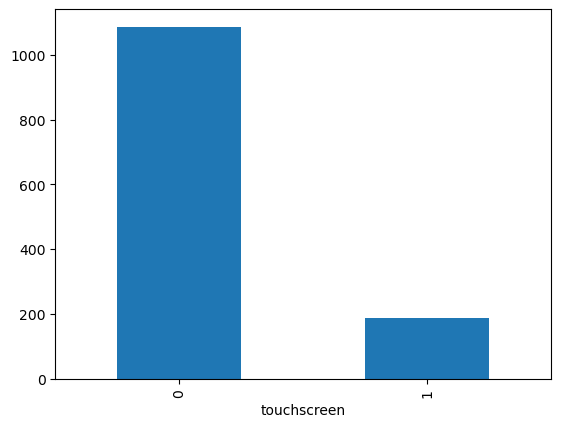

In [131]:
(df['touchscreen'].value_counts()).plot(kind = 'bar')

<Axes: xlabel='touchscreen', ylabel='Price'>

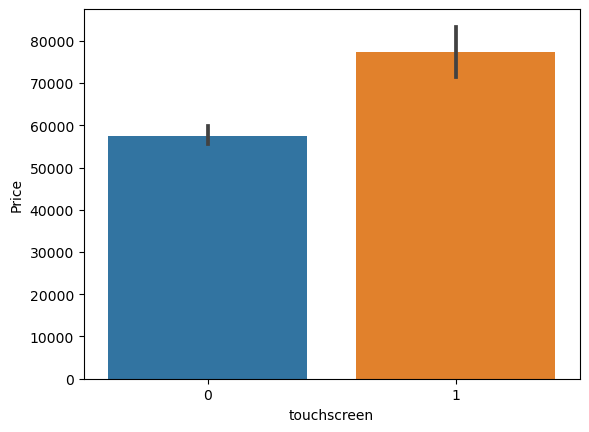

In [132]:
sns.barplot(data = df,x = df['touchscreen'],y = df['Price'])

In [73]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,HD,pixels,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,5,2560x1600,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,5,1440x900,5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920x1080,5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,5,2880x1800,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,5,2560x1600,1


<Axes: xlabel='touchscreen', ylabel='Inches'>

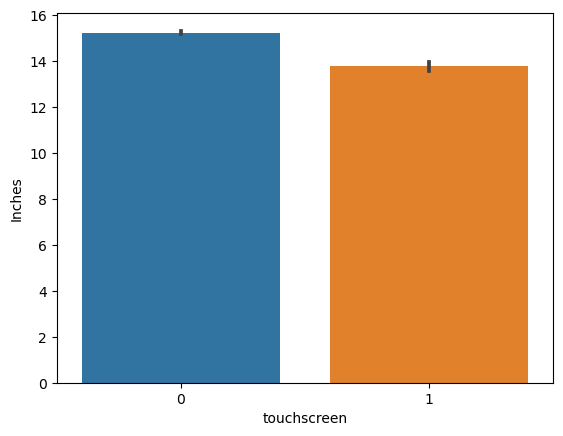

In [134]:
# relate touchscreen and inches
sns.barplot(data = df,x = df['touchscreen'],y = df['Inches'])

Text(0.5, 1.0, 'TOUCHSCREEN-->LESS WEIGHT')

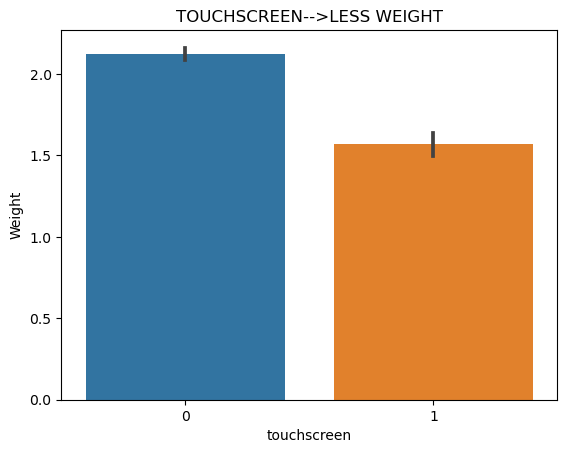

In [33]:
# weight vs touchscreen
sns.barplot(data = df,x = df['touchscreen'],y = df['Weight'])
plt.title("TOUCHSCREEN-->LESS WEIGHT")

<Axes: xlabel='touchscreen'>

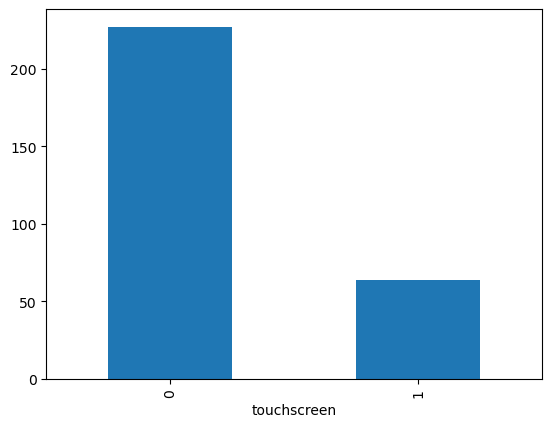

In [147]:
(df[df['Company'] == 'Dell']['touchscreen'].value_counts()).plot(kind = 'bar')

In [26]:
no_of_touchscreen_laptops = []
for cmp in df['Company'].unique():
    no_of_touchscreen_laptops.append(df[df['Company'] == cmp]['touchscreen'].sum())
    

In [27]:
no_of_touchscreen_laptops

[0, 27, 10, 14, 64, 49, 0, 0, 6, 5, 0, 0, 0, 4, 1, 3, 3, 0, 2]

In [28]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

#### no of touchscreen laptops by each company

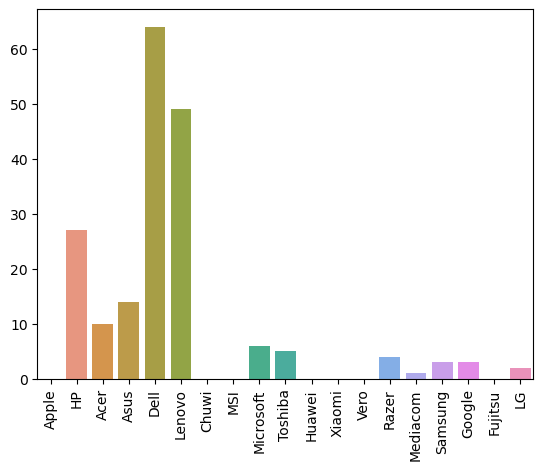

In [32]:
sns.barplot(data = df,x = df['Company'].unique(),y =no_of_touchscreen_laptops)
plt.xticks(rotation = 'vertical')
plt.show()

In [21]:
df[df['Company'] == 'Microsoft']['touchscreen']

70     1
104    1
449    1
457    1
458    1
670    1
Name: touchscreen, dtype: int32

In [24]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,HD,pixels,IPS
595,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6100U 2.3GHz,8,1TB HDD,Intel HD Graphics 520,Windows 10,2.29,24455.52,0,5,1366x768,5
808,Dell,Gaming,15.6,4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.62,89457.12,0,2,3840x2160,5
191,Vero,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.30,13852.80,0,0,1920x1080,0
1250,Dell,Notebook,15.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,4,500GB HDD,Intel HD Graphics,Linux,2.20,17262.72,0,5,1366x768,5
1263,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,500GB HDD,Intel HD Graphics 400,Linux,2.40,15397.92,0,5,1366x768,5


In [75]:
df['IPS'].value_counts()

IPS
5    917
0    340
1     17
Name: count, dtype: int64

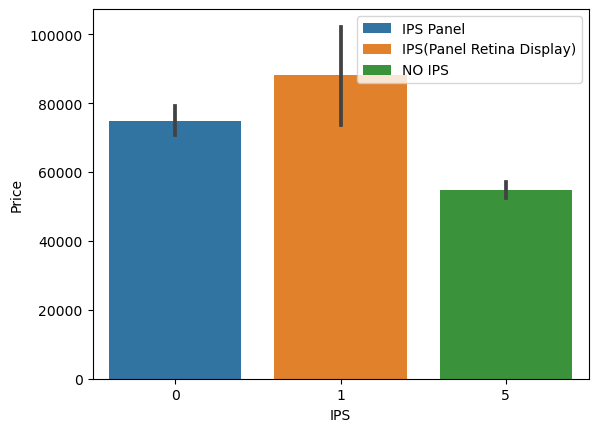

In [76]:
sns.barplot(data = df, x = df['IPS'],y = df['Price'],label = ['IPS Panel','IPS(Panel Retina Display)','NO IPS '])
# legend

plt.legend(loc = 'best')
plt.show()

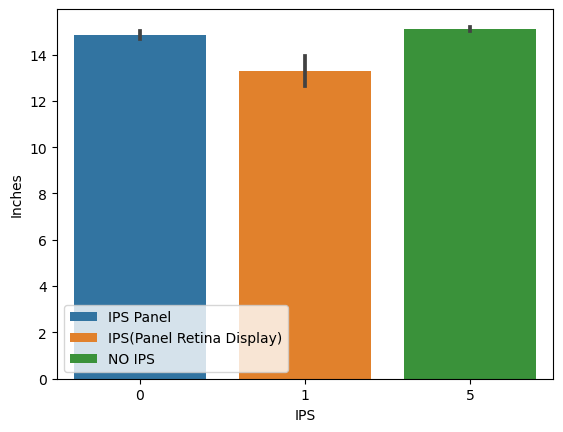

In [77]:
sns.barplot(data = df, x = df['IPS'],y = df['Inches'],label = ['IPS Panel','IPS(Panel Retina Display)','NO IPS '])
# legend

plt.legend(loc = 'best')
plt.show()

#### the 'pixels' col that i have created is useless ..I can't use it to do anything....

### break pixel -->> xpxl and ypxl...

Higher resolutions provide more pixels, which can lead to sharper and clearer images and text, especially on larger screens. However, higher resolution screens also tend to consume more power and can be more expensive.

In [29]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,HD,pixels,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,5,2560x1600,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,5,1440x900,5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920x1080,5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,5,2880x1800,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,5,2560x1600,1


In [26]:
'IPS Panel Retina Display 2560x1600'.split(',')[0]

'IPS Panel Retina Display 2560x1600'

### str.split()

In [29]:
example['text'].str.split(r'\d+', expand=True)

,0,1,2
0,a,b,c
1,d,e,f
2,g,h,i


In [42]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,HD,pixels,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,5,2560x1600,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,5,1440x900,5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920x1080,5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,5,2880x1800,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,5,2560x1600,1


In [140]:
df['ScreenResolution'].str.split(r'[a-zA-Z]+')

0             [,  ,  ,  ,  2560, 1600]
1                          [1440, 900]
2                   [,  ,  1920, 1080]
3             [,  ,  ,  ,  2880, 1800]
4             [,  ,  ,  ,  2560, 1600]
                     ...              
1269                       [1366, 768]
1270     [,  ,  ,  ,  / ,  1920, 1080]
1271    [,  ,  ,  , + / ,  3200, 1800]
1272                       [1366, 768]
1273                       [1366, 768]
Name: ScreenResolution, Length: 1274, dtype: object

In [141]:
df['ScreenResolution'].str.split(r'\d+')

0               [IPS Panel Retina Display , x, ]
1                                        [, x, ]
2                                [Full HD , x, ]
3               [IPS Panel Retina Display , x, ]
4               [IPS Panel Retina Display , x, ]
                          ...                   
1269                                     [, x, ]
1270     [IPS Panel Full HD / Touchscreen , x, ]
1271    [IPS Panel Quad HD+ / Touchscreen , x, ]
1272                                     [, x, ]
1273                                     [, x, ]
Name: ScreenResolution, Length: 1274, dtype: object

In [142]:
pixel_series = df['ScreenResolution'].str.split(r'\D+')
pixel_series

0       [, 2560, 1600]
1          [1440, 900]
2       [, 1920, 1080]
3       [, 2880, 1800]
4       [, 2560, 1600]
             ...      
1269       [1366, 768]
1270    [, 1920, 1080]
1271    [, 3200, 1800]
1272       [1366, 768]
1273       [1366, 768]
Name: ScreenResolution, Length: 1274, dtype: object

In [53]:
pixel_series[0][-1]

'1600'

In [54]:
pixel_series[0]

['', '2560', '1600']

In [143]:
df.loc[:,'xpxl'] = pixel_series.map(lambda input:int(input[-2]))

In [144]:
df.loc[:,'ypxl'] = pixel_series.map(lambda input:int(input[-1]))

In [145]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS,HD,pixels,xpxl,ypxl
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,5,2560x1600,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,5,5,1440x900,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,5,0,1920x1080,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,5,2880x1800,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,5,2560x1600,2560,1600


In [ ]:
# df['xpxls'] = df['ScreenResolution'].map(lambda row: int(pd.Series(row).str.split(r'\D+')))
#  not so good code

In [45]:
pd.Series('IPS Panel Retina Display 2560x1600').str.split(r'\D+')

0    [, 2560, 1600]
dtype: object

In [146]:
df = df.drop(['pixels'],axis = 1)

In [147]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS,HD,xpxl,ypxl
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,5,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,5,5,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,5,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,5,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,5,2560,1600


### analyse ypxl and xpxl with price , screen resolution, inches,company,typename

## correlation and plots
-->> right now I can't make correlation and plot clustermaps and heatmap ... as not every column is numerical but i can make correlation b/w price and xpxl and ypxl .. see if it is  relevant or not.. 

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float32
 10  Price             1274 non-null   float64
 11  touchscreen       1274 non-null   int32  
 12  HD                1274 non-null   int64  
 13  IPS               1274 non-null   int32  
 14  ypxl              1274 non-null   int64  
 15  xpxl              1274 non-null   int64  
dtypes: float32(1), float64(2), int32(3), int64(3), 

In [39]:
corr_matrix = df[['Inches','Price','ypxl','xpxl']].corr()
corr_matrix

,Inches,Price,ypxl,xpxl
Inches,1.000000,0.066990,-0.092768,-0.067916
Price,0.066990,1.000000,0.548111,0.552074
ypxl,-0.092768,0.548111,1.000000,0.994064
xpxl,-0.067916,0.552074,0.994064,1.000000


<Axes: >

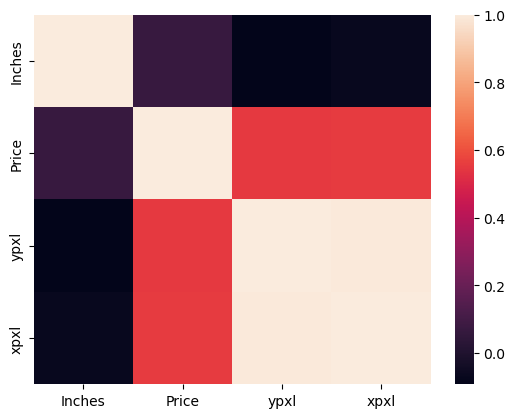

In [40]:
sns.heatmap(corr_matrix)

Here we have pass corr_matrix in sns.heatmap().. what we see here is -->> xpxl and ypxl are more related to price (linear relationship) than Inches..

### alright we did corrleation ....but why did we split 
#### -->> to calc a numerical value 'ppi' which is more relevant

### I just saw a hint about-- pixels per inches -->>Understanding PPI helps in making informed decisions when purchasing a laptop based on the intended use and desired display quality.

In [27]:
df['ppi'] = ((df['xpxl']**2 +df['ypxl']**2)**0.5)/df['Inches']

In [28]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS,HD,xpxl,ypxl,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,5,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,5,5,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,5,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,5,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,5,2560,1600,226.983005


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float32
 10  Price             1274 non-null   float64
 11  touchscreen       1274 non-null   int32  
 12  HD                1274 non-null   int64  
 13  IPS               1274 non-null   int32  
 14  ypxl              1274 non-null   int64  
 15  xpxl              1274 non-null   int64  
 16  ppi               1274 non-null   float64
dtype

In [63]:
(df[['Inches','Price','ypxl','xpxl','ppi']].corr())['Price']

Inches    0.066990
Price     1.000000
ypxl      0.548111
xpxl      0.552074
ppi       0.469539
Name: Price, dtype: float64

####   we split into xpxl and ypxl because we want to create a feature  pixel per inches.Now we will not  use inches and xpxl and ypxl..

In [55]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,HD,IPS,ypxl,xpxl,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,5,1,1600,2560,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,5,5,900,1440,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,5,1080,1920,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,5,1,1800,2880,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,5,1,1600,2560,226.983005


### As of now we have completely used the column ScreenResolution.. Now we will drop it

### NOTE:
In cols HD and IPS-->> 5 denotes that these features are not present in the ScreenResolution 

In [148]:
df = df.drop(['ScreenResolution'],axis = 1)  
# rerun it 

In [149]:
df.drop(['Inches','ypxl','xpxl'],axis = 1,inplace = True)

In [150]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS,HD
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,5,5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,5,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,5
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,5


## NOW START WORKING ON Cpu ,Memory,Gpu

In [29]:
cpu = df['Cpu'].value_counts()
cpu

Cpu
Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     132
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core M M3-6Y30 0.9GHz      1
AMD A9-Series 9420 2.9GHz        1
Intel Core i5 2.9GHz             1
AMD A6-Series 7310 2GHz          1
AMD A9-Series 9410 2.9GHz        1
Name: count, Length: 118, dtype: int64

In [30]:
cpu.index

Index(['Intel Core i5 7200U 2.5GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i5 6200U 2.3GHz',
       'Intel Core i3 6006U 2GHz', 'Intel Core i7 6500U 2.5GHz',
       'Intel Core i7 6700HQ 2.6GHz', 'Intel Core i3 7100U 2.4GHz',
       ...
       'Intel Xeon E3-1535M v6 3.1GHz', 'AMD E-Series E2-6110 1.5GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'Intel Core i3 6100U 2.1GHz',
       'AMD E-Series E2-9000 2.2GHz', 'Intel Core M M3-6Y30 0.9GHz',
       'AMD A9-Series 9420 2.9GHz', 'Intel Core i5 2.9GHz',
       'AMD A6-Series 7310 2GHz', 'AMD A9-Series 9410 2.9GHz'],
      dtype='object', name='Cpu', length=118)

In [31]:
cpu.values

array([190, 146, 132,  73,  72,  68,  64,  41,  41,  35,  33,  30,  24,
        18,  16,  14,  14,  13,  11,  11,  11,  10,   9,   8,   7,   7,
         7,   7,   5,   5,   5,   5,   5,   5,   5,   4,   4,   4,   4,
         3,   3,   3,   3,   3,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1], dtype=int64)

In [32]:
cpu.head(60)

Cpu
Intel Core i5 7200U 2.5GHz              190
Intel Core i7 7700HQ 2.8GHz             146
Intel Core i7 7500U 2.7GHz              132
Intel Core i7 8550U 1.8GHz               73
Intel Core i5 8250U 1.6GHz               72
Intel Core i5 6200U 2.3GHz               68
Intel Core i3 6006U 2GHz                 64
Intel Core i7 6500U 2.5GHz               41
Intel Core i7 6700HQ 2.6GHz              41
Intel Core i3 7100U 2.4GHz               35
Intel Core i5 7300HQ 2.5GHz              33
Intel Celeron Dual Core N3350 1.1GHz     30
Intel Celeron Dual Core N3060 1.6GHz     24
Intel Core i7 6600U 2.6GHz               18
Intel Core i3 6006U 2.0GHz               16
Intel Core i5 7300U 2.6GHz               14
Intel Pentium Quad Core N4200 1.1GHz     14
Intel Core i7 7600U 2.8GHz               13
Intel Pentium Quad Core N3710 1.6GHz     11
Intel Core i5 6300U 2.4GHz               11
AMD A9-Series 9420 3GHz                  11
Intel Core i7 6820HK 2.7GHz              10
Intel Core i3 6100U 2.3GHz  

#### I thought clockspeed would be good column .. but later on while I was coding there was a mistake clockspeed showed wrong values.. I had done mistake in splitting or slicing the string properly.. I will try again to do it properly .later when I saw this mistake i dropped this col

### clockspeed cols

In [151]:
clock = df['Cpu'].str.split(r'\D+')

In [152]:
clock

0             [, 5, 2, 3, ]
1             [, 5, 1, 8, ]
2       [, 5, 7200, 2, 5, ]
3             [, 7, 2, 7, ]
4             [, 5, 3, 1, ]
               ...         
1269    [, 7, 6500, 2, 5, ]
1270    [, 7, 6500, 2, 5, ]
1271    [, 7, 6500, 2, 5, ]
1272       [, 3050, 1, 6, ]
1273    [, 7, 6500, 2, 5, ]
Name: Cpu, Length: 1274, dtype: object

In [153]:
x = df['Cpu'].str.split(r'[a-zA-Z]+')
x.head(60)

0               [,  ,  , 5 2.3, ]
1               [,  ,  , 5 1.8, ]
2        [,  ,  , 5 7200,  2.5, ]
3               [,  ,  , 7 2.7, ]
4               [,  ,  , 5 3.1, ]
5            [,  , 9-,  9420 3, ]
6               [,  ,  , 7 2.2, ]
7               [,  ,  , 5 1.8, ]
8        [,  ,  , 7 8550,  1.8, ]
9        [,  ,  , 5 8250,  1.6, ]
10       [,  ,  , 5 7200,  2.5, ]
11         [,  ,  , 3 6006,  2, ]
12              [,  ,  , 7 2.8, ]
13         [,  ,  , 3 6006,  2, ]
14           [,  ,  ,  , 3 1.2, ]
15              [,  ,  , 5 2.3, ]
16       [,  ,  , 7 7500,  2.7, ]
17              [,  ,  , 7 2.9, ]
18       [,  ,  , 3 7100,  2.4, ]
19       [,  ,  , 5 8250,  1.6, ]
20      [,  ,  , 5-, 8350 1.44, ]
21       [,  ,  , 5 7300,  2.5, ]
22    [,  , -,  , 2-9000,  1.5, ]
23       [,  ,  , 5 8250,  1.6, ]
24       [,  ,  , 7 8550,  1.8, ]
25         [,  ,  , 3 6006,  2, ]
26              [,  ,  , 5 1.6, ]
27       [,  ,  , 5 8250,  1.6, ]
28       [,  ,  , 7 8650,  1.9, ]
29       [,  ,

In [33]:
x.head(1)

0    [,  ,  , 5 2.3, ]
Name: Cpu, dtype: object

In [34]:
x[0]

['', ' ', ' ', '5 2.3', '']

In [154]:
egg = x.map(lambda r: r[-2])
egg

0          5 2.3
1          5 1.8
2            2.5
3          7 2.7
4          5 3.1
          ...   
1269         2.5
1270         2.5
1271         2.5
1272    3050 1.6
1273         2.5
Name: Cpu, Length: 1274, dtype: object

In [155]:
new_egg = egg.map(lambda clk: clk[-3:])
new_egg

0       2.3
1       1.8
2       2.5
3       2.7
4       3.1
       ... 
1269    2.5
1270    2.5
1271    2.5
1272    1.6
1273    2.5
Name: Cpu, Length: 1274, dtype: object

### use simply .str.replace(' ','')

In [156]:
alpa = new_egg.str.replace(' ','')
alpa

0       2.3
1       1.8
2       2.5
3       2.7
4       3.1
       ... 
1269    2.5
1270    2.5
1271    2.5
1272    1.6
1273    2.5
Name: Cpu, Length: 1274, dtype: object

In [124]:
new_egg[0]

'2.3'

In [157]:
floated = pd.Series(np.float32(alpa))
floated.head(60)

0     2.30
1     1.80
2     2.50
3     2.70
4     3.10
5     3.00
6     2.20
7     1.80
8     1.80
9     1.60
10    2.50
11    2.00
12    2.80
13    2.00
14    1.20
15    2.30
16    2.70
17    2.90
18    2.40
19    1.60
20    0.44
21    2.50
22    1.50
23    1.60
24    1.80
25    2.00
26    1.60
27    1.60
28    1.90
29    1.60
30    0.44
31    1.50
32    2.50
33    1.80
34    1.60
35    1.10
36    2.70
37    1.60
38    2.50
39    1.60
40    2.00
41    2.80
42    2.50
43    1.60
44    1.60
45    2.00
46    2.00
47    3.00
48    2.50
49    1.10
50    0.44
51    1.80
52    2.50
53    1.80
54    2.40
55    1.80
56    2.00
57    2.50
58    2.80
59    2.00
dtype: float32

In [76]:
np.float32(x[0][-2][-3:])

2.3

In [158]:
df['clockspeed'] = floated

In [159]:
df.head(6)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS,HD,clockspeed
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,5,2.3
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,5,5,1.8
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,5,0,2.5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,5,2.7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,5,3.1
5,Acer,Notebook,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,21312.0000,0,5,5,3.0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1274 non-null   object 
 1   TypeName     1274 non-null   object 
 2   Cpu          1274 non-null   object 
 3   Ram          1274 non-null   int32  
 4   Memory       1274 non-null   object 
 5   Gpu          1274 non-null   object 
 6   OpSys        1274 non-null   object 
 7   Weight       1274 non-null   float32
 8   Price        1274 non-null   float64
 9   touchscreen  1274 non-null   int64  
 10  IPS          1274 non-null   int32  
 11  HD           1274 non-null   int64  
 12  ppi          1274 non-null   float64
 13  clockspeed   1274 non-null   float32
dtypes: float32(2), float64(2), int32(2), int64(2), object(6)
memory usage: 161.7+ KB


In [160]:
df.sample(6)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS,HD,clockspeed
5,Acer,Notebook,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.1,21312.00,0,5,5,3.0
120,Acer,Notebook,Intel Core i3 7100U 2.4GHz,6,1TB HDD,Intel HD Graphics 620,Windows 10,2.1,25521.12,1,0,0,2.4
1253,Lenovo,Notebook,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.9,57116.16,0,0,0,2.3
912,Lenovo,Notebook,Intel Core i7 7500U 2.7GHz,6,256GB SSD,Nvidia GeForce 940MX,Windows 10,2.2,42037.92,0,5,0,2.7
650,Asus,Gaming,Intel Core i7 6820HK 2.7GHz,32,512GB SSD,Nvidia GeForce GTX 1080,Windows 10,3.8,149130.72,0,0,0,2.7
1015,Toshiba,Notebook,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.5,64468.80,0,5,5,2.3


In [161]:
df['Intel Core i5'] = df['Cpu'].map(lambda row : 1 if 'Intel Core i5' in row else 0)
df['Intel Core i3'] = df['Cpu'].map(lambda row : 1 if 'Intel Core i3' in row else 0)
df['Intel Core i7'] = df['Cpu'].map(lambda row : 1 if 'Intel Core i7' in row else 0)
df['AMD cpu'] = df['Cpu'].map(lambda row : 1 if 'AMD' in row else 0)


In [162]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS,HD,clockspeed,Intel Core i5,Intel Core i3,Intel Core i7,AMD cpu
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,5,2.3,1,0,0,0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,5,5,1.8,1,0,0,0
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,5,0,2.5,1,0,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,5,2.7,0,0,1,0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,5,3.1,1,0,0,0


In [163]:
df['other processor'] = df['Cpu'].map(lambda row : 0 if 'Intel Core i5' in row or 'Intel Core i3' in row or 'Intel Core i7' in row or 'AMD' in row else 1)

In [164]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS,HD,clockspeed,Intel Core i5,Intel Core i3,Intel Core i7,AMD cpu,other processor
315,Dell,Notebook,Intel Core i5 8250U 1.6GHz,8,128GB SSD + 1TB HDD,AMD Radeon 530,Windows 10,2.33,44968.3200,0,5,0,1.6,1,0,0,0,0
1212,MSI,Gaming,Intel Core i7 6700HQ 2.6GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.43,103842.1872,0,0,0,2.6,0,0,1,0,0
23,Dell,2 in 1 Convertible,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.62,43636.3200,1,5,0,1.6,1,0,0,0,0
427,Dell,Ultrabook,Intel Core i7 7600U 2.8GHz,8,256GB SSD,Intel HD Graphics 620,Linux,1.60,58554.7200,0,5,0,2.8,0,0,1,0,0
998,Asus,Gaming,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,95850.7200,0,5,0,2.8,0,0,1,0,0


#### I wanted to do this!
there would be a col for categories of Cpu ..

In [165]:
#  output to ek function bhi deta hai..
def specific(input):
    if ('Intel Core i5' in input):
        return 'Intel Core i5'
    elif('Intel Core i3' in input):
        return 'Intel Core i3' 
    elif('Intel Core i7' in input):
        return 'Intel Core i7' 
    elif('AMD' in input):
        return 'AMD'
    else:
        return 'others'

In [166]:
df['Cpu Brand'] = df['Cpu'].map(lambda row : specific(row))

In [167]:
df.sample(10)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS,HD,clockspeed,Intel Core i5,Intel Core i3,Intel Core i7,AMD cpu,other processor,Cpu Brand
878,Dell,Notebook,Intel Core i5 7200U 2.5GHz,4,128GB SSD + 1TB HDD,Nvidia GeForce 940MX,Windows 10,2.18,48618.0000,0,5,0,2.50,1,0,0,0,0,Intel Core i5
1205,Dell,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,AMD Radeon R7 M445,Windows 10,2.36,47365.9200,0,5,0,2.50,1,0,0,0,0,Intel Core i5
240,Lenovo,Notebook,Intel Core i3 6006U 2GHz,8,128GB SSD,Intel HD Graphics 520,Windows 10,2.20,31381.9200,0,5,5,2.00,0,1,0,0,0,Intel Core i3
945,Lenovo,Gaming,AMD FX 8800P 2.1GHz,16,512GB SSD + 1TB HDD,AMD Radeon R9 M385,Windows 10,2.50,53226.7200,0,0,0,2.10,0,0,0,1,0,AMD
363,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Intel HD Graphics 620,Windows 10,1.86,34045.9200,0,5,0,2.50,1,0,0,0,0,Intel Core i5
1131,Lenovo,2 in 1 Convertible,Intel Core i7 6600U 2.6GHz,8,512GB SSD,Nvidia Quadro M500M,Windows 7,1.80,109244.2464,1,0,0,2.60,0,0,1,0,0,Intel Core i7
896,Dell,Gaming,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia GeForce GTX 1050Ti,Linux,2.62,49497.1200,0,5,0,2.80,0,0,1,0,0,Intel Core i7
834,Lenovo,Notebook,Intel Core i5 7300U 2.6GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.32,87912.0000,0,0,0,2.60,1,0,0,0,0,Intel Core i5
257,HP,Notebook,Intel Core i7 8550U 1.8GHz,16,1TB HDD,Nvidia GeForce MX150,Windows 10,2.90,56423.5200,0,0,0,1.80,0,0,1,0,0,Intel Core i7
20,Asus,Netbook,Intel Atom x5-Z8350 1.44GHz,2,32GB Flash Storage,Intel HD Graphics 400,Windows 10,0.98,10224.4320,0,5,5,0.44,0,0,0,0,1,others


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          1274 non-null   object 
 1   TypeName         1274 non-null   object 
 2   Cpu              1274 non-null   object 
 3   Ram              1274 non-null   int32  
 4   Memory           1274 non-null   object 
 5   Gpu              1274 non-null   object 
 6   OpSys            1274 non-null   object 
 7   Weight           1274 non-null   float32
 8   Price            1274 non-null   float64
 9   touchscreen      1274 non-null   int64  
 10  IPS              1274 non-null   int32  
 11  HD               1274 non-null   int64  
 12  ppi              1274 non-null   float64
 13  clockspeed       1274 non-null   float32
 14  Intel Core i5    1274 non-null   int64  
 15  Intel Core i3    1274 non-null   int64  
 16  Intel Core i7    1274 non-null   int64  
 17  other processor  12

<Axes: xlabel='Cpu Brand'>

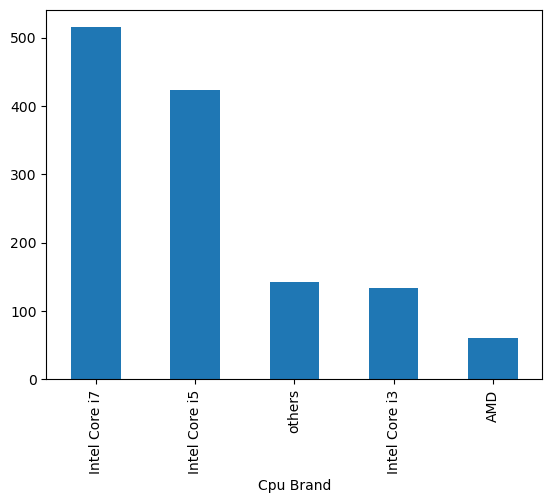

In [118]:
df['Cpu Brand'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Cpu Brand', ylabel='Price'>

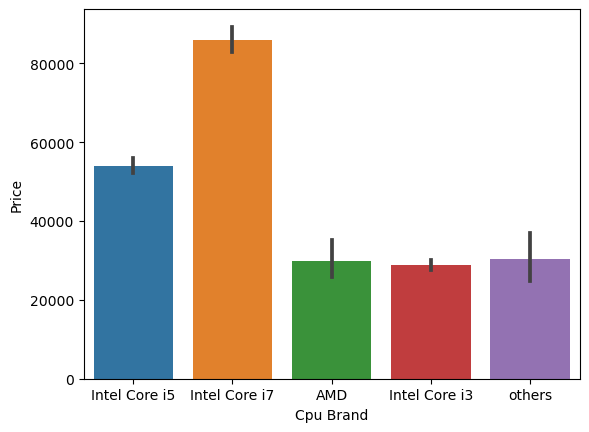

In [119]:
sns.barplot(data = df ,x = df['Cpu Brand'] ,y = df['Price'])

In [168]:
df.drop(['Intel Core i5','Intel Core i3','Intel Core i7','other processor'],axis =1,inplace = True)

In [169]:
df.drop(['AMD cpu','Cpu'],axis =1,inplace  =True)

In [170]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS,HD,clockspeed,Cpu Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,5,2.3,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,5,5,1.8,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,5,0,2.5,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,5,2.7,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,5,3.1,Intel Core i5


In [129]:
df['clockspeed'].max()

63.0

#### I was talking about this mistake....

### there is something wrong with clockspeed data ..it's value can't be so high.. there must be some mistake in slicing or splitting..

In [130]:
# sns.barplot(data = df ,x = df['clockspeed'] ,y = df['Price'])
# plt.xticks(rotation = 'vertical')
# plt.show()

####  therfore I couldn't figure out the info out of the plot

In [171]:
df.drop(['clockspeed'],axis = 1,inplace  = True)

In [172]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS,HD,Cpu Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,5,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,5,5,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,5,0,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,5,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,5,Intel Core i5


#### now i have to work on Memory, Gpu and OpSys  ..

#### Ram is also a categorical column

<Axes: xlabel='Ram'>

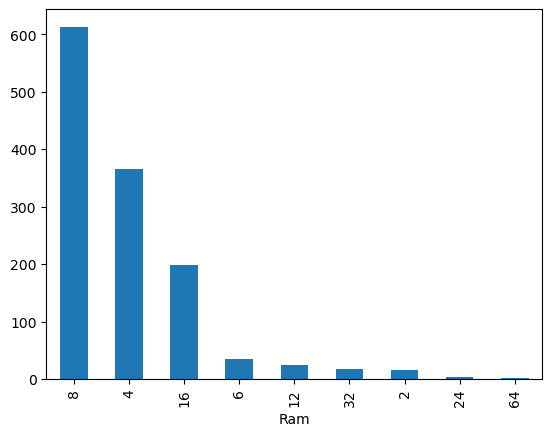

In [134]:
df['Ram'].value_counts().plot(kind = 'bar')

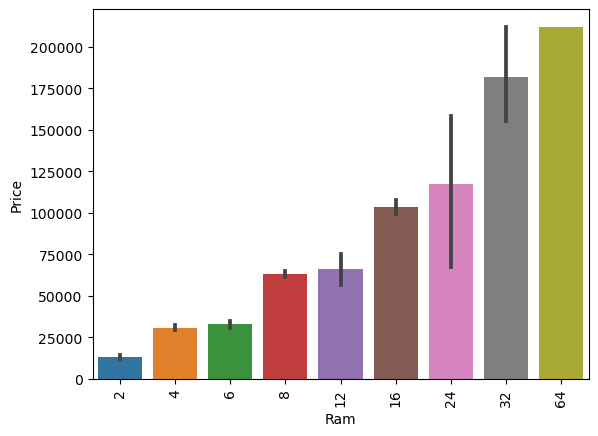

In [135]:
sns.barplot(data = df ,x = df['Ram'] ,y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

### 8gb ka aur 12 gb ka price same  hai ?? -->> ho skta hai 12 gb ka sticker ho bas asli mein 8 gb ka ho .. taki sales jyada ho .. kam price aur jyada gb

In [136]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS,HD,ppi,Cpu Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,5,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,5,5,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,5,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,5,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,5,226.983005,Intel Core i5


In [137]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          215
500GB HDD                        123
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

### cost of HDD and SSD is compared in cost per Gb

### problem statement -->>
## Q)create four cols HDD,SSD,Flash Storage,Hybrid which will contain numeric values of memory.. it is also necessary to indicate which is GB and which is TB....

In [173]:
memo = df['Memory'].copy()
memo

0                 128GB SSD
1       128GB Flash Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1269              500GB HDD
1270              128GB SSD
1271              512GB SSD
1272     64GB Flash Storage
1273                1TB HDD
Name: Memory, Length: 1274, dtype: object

In [55]:
memo[0].split()

['128GB', 'SSD']

In [174]:
split_memory = memo.map(lambda row:row.split())
len(split_memory[0])

2

In [55]:
split_memory.tail(50)

1224                 [500GB, HDD]
1225                   [1TB, HDD]
1226                 [256GB, SSD]
1227                   [1TB, HDD]
1228    [128GB, SSD, +, 1TB, HDD]
1229    [128GB, SSD, +, 1TB, HDD]
1230                 [512GB, SSD]
1231                   [1TB, SSD]
1232                   [1TB, HDD]
1233    [256GB, SSD, +, 1TB, HDD]
1234      [256GB, Flash, Storage]
1235                   [1TB, HDD]
1236                 [256GB, SSD]
1237                 [500GB, HDD]
1238    [128GB, SSD, +, 1TB, HDD]
1239                 [512GB, SSD]
1240                 [256GB, SSD]
1241                 [256GB, SSD]
1242                 [500GB, HDD]
1243                 [512GB, SSD]
1244                 [256GB, SSD]
1245    [256GB, SSD, +, 1TB, HDD]
1246                 [500GB, HDD]
1247    [256GB, SSD, +, 1TB, HDD]
1248                 [256GB, SSD]
1249                 [256GB, SSD]
1250                 [500GB, HDD]
1251                 [500GB, HDD]
1252                 [128GB, SSD]
1253          

In [58]:
split_memory.head()

0               [128GB, SSD]
1    [128GB, Flash, Storage]
2               [256GB, SSD]
3               [512GB, SSD]
4               [256GB, SSD]
Name: Memory, dtype: object

In [77]:
split_memory.index

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273],
      dtype='int64', length=1274)

In [68]:
if 'SSD' in split_memory[0]:
    print("True")

True


In [62]:
example = pd.DataFrame({
    'A':[1,1,1,1,1,1,1],
    'B':[3,3,3,3,3,3,3]
})
example

,A,B
0,1,3
1,1,3
2,1,3
3,1,3
4,1,3
5,1,3
6,1,3


In [67]:
example.loc[0,'B']

3

In [72]:
trial = split_memory.map(lambda row: len(row)==2)
trial.value_counts()

Memory
True     996
False    278
Name: count, dtype: int64

In [94]:
only_string = pd.Series(["A"] * 10)
only_string

0    A
1    A
2    A
3    A
4    A
5    A
6    A
7    A
8    A
9    A
dtype: object

#### problem is that I want to fill values like '128GB' in the HDD ,SSD ,like cols.. but the cols hold only int datatype...string is not compatible.. 

#### new cols way

In [175]:
df['HDD'] = pd.Series(['0']*len(df))
df['SSD'] = pd.Series(['0']*len(df))
df['Flash Storage'] = pd.Series(['0']*len(df))
df['Hybrid'] = pd.Series(['0']*len(df))

In [57]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS,HD,ppi,Cpu Brand,HDD,SSD,Flash Storage,Hybrid
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,5,226.983005,Intel Core i5,0,0,0,0
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,5,5,127.677940,Intel Core i5,0,0,0,0
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,5,0,141.211998,Intel Core i5,0,0,0,0
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,5,220.534624,Intel Core i7,0,0,0,0
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,5,226.983005,Intel Core i5,0,0,0,0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1274 non-null   object 
 1   TypeName       1274 non-null   object 
 2   Ram            1274 non-null   int32  
 3   Memory         1274 non-null   object 
 4   Gpu            1274 non-null   object 
 5   OpSys          1274 non-null   object 
 6   Weight         1274 non-null   float32
 7   Price          1274 non-null   float64
 8   touchscreen    1274 non-null   int64  
 9   IPS            1274 non-null   int32  
 10  HD             1274 non-null   int64  
 11  Cpu Brand      1274 non-null   object 
 12  HDD            1274 non-null   object 
 13  SSD            1274 non-null   object 
 14  Flash Storage  1274 non-null   object 
 15  Hybrid         1274 non-null   object 
dtypes: float32(1), float64(1), int32(2), int64(2), object(10)
memory usage: 186.6+ KB


In [266]:
# df['HDD'] = df['HDD'].map(lambda input:input[0])

#### I can't use nested lambda

In [ ]:
# trial = split_memory.map(lambda row: ## output-->> memory_allocator(row as input))
# # trial

In [80]:
split_memory

0                  [128GB, SSD]
1       [128GB, Flash, Storage]
2                  [256GB, SSD]
3                  [512GB, SSD]
4                  [256GB, SSD]
                 ...           
1269               [500GB, HDD]
1270               [128GB, SSD]
1271               [512GB, SSD]
1272     [64GB, Flash, Storage]
1273                 [1TB, HDD]
Name: Memory, Length: 1274, dtype: object

#### I think instead of lambda i should use for loop..

#### Create a program to do these tasks automatically....

#### below  code is messy .. I will fix it later as I will improve ...

In [176]:
row_idx = 0
for input in split_memory:
     #  for len = 2
    if (len(input) == 2):
        # HDD/SSD/Hybrid check which is it ?
        if 'HDD' in input[1]:
            # do sthing
            df.loc[row_idx,'HDD'] = input[0]
        elif 'SSD' in input[1]:
            # do something
            df.loc[row_idx,'SSD'] = input[0]
        else:
            # 'Hybrid'
            df.loc[row_idx,'Hybrid'] = input[0]
        row_idx += 1
        # break
       
    # Flash Storage 
    if (len(input) == 3):
        df.loc[row_idx,'Flash Storage'] = input[0]
        row_idx += 1
        # break

    
    # two HDD + SSD + Hybrid taken two at a time
    if(len(input)==5):
        if(input[1] == 'SSD'):
            df.loc[row_idx,'SSD'] = input[0]
        elif(input[1] == 'HDD'):
            df.loc[row_idx,'HDD'] = input[0]
        elif(input[1]=='Hybrid'):
            df.loc[row_idx,'Hybrid'] = input[0]

        if(input[-1] == 'SSD'):
            df.loc[row_idx,'SSD'] = input[-2]
        elif(input[-1] == 'HDD'):
            df.loc[row_idx,'HDD'] = input[-2]
        elif(input[-1]=='Hybrid'):
            df.loc[row_idx,'Hybrid'] = input[-2]
        row_idx +=1
        # break
        
    # flash storage + any other 
    if(len(input)==6):
        # flash
        if(input[1] == 'Flash'):
            df.loc[row_idx,'Flash Storage'] = input[0]
        elif(input[-2] == 'Flash'):
            df.loc[row_idx,'Flash Storage'] = input[-3]
        # other 
        if(input[1] == 'SSD'):
            df.loc[row_idx,'SSD'] = input[0]
        elif(input[1] == 'HDD'):
            df.loc[row_idx,'HDD'] = input[0]
        elif(input[1]=='Hybrid'):
            df.loc[row_idx,'Hybrid'] = input[0]
            
        if(input[-2] == 'SSD'):
            df.loc[row_idx,'SSD'] = input[-3]
        elif(input[-2] == 'HDD'):
            df.loc[row_idx,'HDD'] = input[-3]
        elif(input[-2]=='Hybrid'):
            df.loc[row_idx,'Hybrid'] = input[-3]
        row_idx +=1
        # break

    
    
    

In [177]:
df.sample(50)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS,HD,Cpu Brand,HDD,SSD,Flash Storage,Hybrid
379,Acer,Notebook,8,1TB HDD,Nvidia GeForce GTX 1050,Linux,2.40,45074.8800,0,5,0,Intel Core i7,1TB,0,0,0
55,Dell,Notebook,8,256GB SSD,AMD Radeon 520,Windows 10,2.13,40908.3840,0,5,0,Intel Core i7,0,256GB,0,0
571,HP,Notebook,8,2TB HDD,Intel HD Graphics 405,Windows 10,1.94,20725.9200,0,5,5,others,2TB,0,0,0
655,Toshiba,Notebook,8,500GB HDD,Intel HD Graphics 620,Windows 10,2.00,56689.9200,0,0,0,Intel Core i5,500GB,0,0,0
742,Toshiba,Notebook,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.25,81784.8000,1,0,0,Intel Core i5,0,256GB,0,0
453,Lenovo,Notebook,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.65,71661.6000,0,5,0,Intel Core i5,0,256GB,0,0
591,Lenovo,Notebook,12,512GB SSD,AMD Radeon 530,Windows 10,2.20,50562.7200,0,5,0,AMD,0,512GB,0,0
305,Lenovo,Notebook,4,1TB HDD,Intel HD Graphics 505,No OS,2.20,19180.2672,0,5,5,others,1TB,0,0,0
631,Dell,Gaming,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.62,78801.1200,0,5,0,Intel Core i7,1TB,256GB,0,0
86,HP,Ultrabook,8,256GB SSD,Nvidia GeForce GTX 940MX,Windows 10,1.83,37242.7200,0,0,0,Intel Core i7,0,256GB,0,0


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1274 non-null   object 
 1   TypeName       1274 non-null   object 
 2   Ram            1274 non-null   int32  
 3   Memory         1274 non-null   object 
 4   Gpu            1274 non-null   object 
 5   OpSys          1274 non-null   object 
 6   Weight         1274 non-null   float32
 7   Price          1274 non-null   float64
 8   touchscreen    1274 non-null   int64  
 9   IPS            1274 non-null   int32  
 10  HD             1274 non-null   int64  
 11  Cpu Brand      1274 non-null   object 
 12  HDD            1274 non-null   object 
 13  SSD            1274 non-null   object 
 14  Flash Storage  1274 non-null   object 
 15  Hybrid         1274 non-null   object 
dtypes: float32(1), float64(1), int32(2), int64(2), object(10)
memory usage: 186.6+ KB


In [60]:
df['HDD'].value_counts()

HDD
0        716
1TB      399
500GB    125
2TB       31
32GB       1
128GB      1
1.0TB      1
Name: count, dtype: int64

<Axes: xlabel='HDD'>

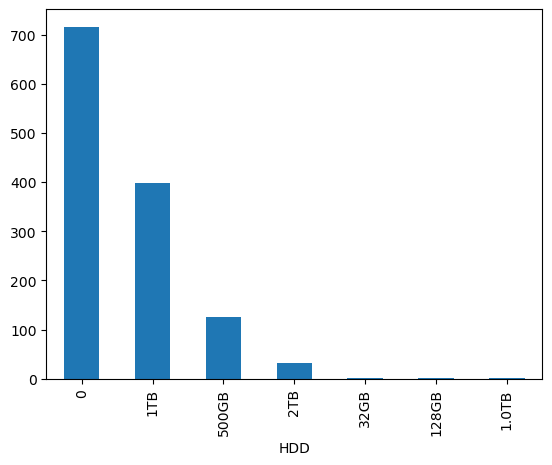

In [273]:
df['HDD'].value_counts().plot(kind = 'bar')

#### There is a problem with my way.. pandas is differentiating 1TB and 1.0TB  as they both are in strings..I should convert them into int type.. to tell that both are same..

In [112]:
df[df['HDD'] == '1TB']

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS,HD,Cpu Brand,HDD,SSD,Flash Storage,Hybrid
18,Lenovo,Notebook,8,1TB HDD,Nvidia GeForce 940MX,No OS,2.20,26586.7200,0,5,0,Intel Core i3,1TB,0,0,0
21,Lenovo,Gaming,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.50,53226.7200,0,0,0,Intel Core i5,1TB,128GB,0,0
25,Dell,Notebook,4,1TB HDD,Intel HD Graphics 520,Windows 10,2.30,22305.1392,0,5,5,Intel Core i3,1TB,0,0,0
29,HP,Notebook,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.50,47738.8800,0,5,0,Intel Core i5,1TB,0,0,0
36,Acer,Notebook,4,1TB HDD,Intel HD Graphics 620,Linux,2.10,19553.7600,0,5,5,Intel Core i3,1TB,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,MSI,Gaming,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.40,65481.1200,0,5,0,Intel Core i7,1TB,128GB,0,0
1262,Dell,Notebook,6,1TB HDD,Intel HD Graphics 620,Windows 10,2.30,24455.5200,0,5,5,Intel Core i3,1TB,0,0,0
1265,Lenovo,Notebook,8,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.60,47898.7200,0,0,0,Intel Core i7,1TB,0,0,0
1267,Dell,Notebook,8,1TB HDD,AMD Radeon R5 M430,Linux,2.30,42943.1472,0,5,5,Intel Core i7,1TB,0,0,0


In [114]:
df[df['HDD']=='1.0TB']

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS,HD,Cpu Brand,HDD,SSD,Flash Storage,Hybrid
1075,Lenovo,Notebook,8,1.0TB HDD,AMD Radeon R5 M330,Windows 10,3.0,35111.52,0,5,5,Intel Core i5,1.0TB,0,0,0


In [123]:
store = df[['HDD','SSD','Flash Storage','Hybrid']]
store

,HDD,SSD,Flash Storage,Hybrid
0,0,128GB,0,0
1,0,0,128GB,0
2,0,256GB,0,0
3,0,512GB,0,0
4,0,256GB,0,0
...,...,...,...,...
1269,500GB,0,0,0
1270,0,128GB,0,0
1271,0,512GB,0,0
1272,0,0,64GB,0


#### I am little bit confused in replace and regex .. when to use and where..

In [178]:
df['Memory'] = df['Memory'].str.replace('GB','')
df['Memory'] = df['Memory'].str.replace('TB','100')

In [179]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS,HD,Cpu Brand,HDD,SSD,Flash Storage,Hybrid
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,5,Intel Core i5,0,128GB,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,5,5,Intel Core i5,0,0,128GB,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,5,0,Intel Core i5,0,256GB,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,5,Intel Core i7,0,512GB,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,5,Intel Core i5,0,256GB,0,0


In [180]:
new_memo = df['Memory'].copy()

In [181]:
split_memory = new_memo.map(lambda row:row.split())
split_memory

0                  [128, SSD]
1       [128, Flash, Storage]
2                  [256, SSD]
3                  [512, SSD]
4                  [256, SSD]
                ...          
1269               [500, HDD]
1270               [128, SSD]
1271               [512, SSD]
1272     [64, Flash, Storage]
1273              [1100, HDD]
Name: Memory, Length: 1274, dtype: object

In [182]:
row_idx = 0
for input in split_memory:
     #  for len = 2
    if (len(input) == 2):
        # HDD/SSD/Hybrid check which is it ?
        if 'HDD' in input[1]:
            # do sthing
            df.loc[row_idx,'HDD'] = input[0]
        elif 'SSD' in input[1]:
            # do something
            df.loc[row_idx,'SSD'] = input[0]
        else:
            # 'Hybrid'
            df.loc[row_idx,'Hybrid'] = input[0]
        row_idx += 1
        # break
       
    # Flash Storage 
    if (len(input) == 3):
        df.loc[row_idx,'Flash Storage'] = input[0]
        row_idx += 1
        # break

    
    # two HDD + SSD + Hybrid taken two at a time
    if(len(input)==5):
        if(input[1] == 'SSD'):
            df.loc[row_idx,'SSD'] = input[0]
        elif(input[1] == 'HDD'):
            df.loc[row_idx,'HDD'] = input[0]
        elif(input[1]=='Hybrid'):
            df.loc[row_idx,'Hybrid'] = input[0]

        if(input[-1] == 'SSD'):
            df.loc[row_idx,'SSD'] = input[-2]
        elif(input[-1] == 'HDD'):
            df.loc[row_idx,'HDD'] = input[-2]
        elif(input[-1]=='Hybrid'):
            df.loc[row_idx,'Hybrid'] = input[-2]
        row_idx +=1
        # break
        
    # flash storage + any other 
    if(len(input)==6):
        # flash
        if(input[1] == 'Flash'):
            df.loc[row_idx,'Flash Storage'] = input[0]
        elif(input[-2] == 'Flash'):
            df.loc[row_idx,'Flash Storage'] = input[-3]
        # other 
        if(input[1] == 'SSD'):
            df.loc[row_idx,'SSD'] = input[0]
        elif(input[1] == 'HDD'):
            df.loc[row_idx,'HDD'] = input[0]
        elif(input[1]=='Hybrid'):
            df.loc[row_idx,'Hybrid'] = input[0]
            
        if(input[-2] == 'SSD'):
            df.loc[row_idx,'SSD'] = input[-3]
        elif(input[-2] == 'HDD'):
            df.loc[row_idx,'HDD'] = input[-3]
        elif(input[-2]=='Hybrid'):
            df.loc[row_idx,'Hybrid'] = input[-3]
        row_idx +=1
        # break


In [183]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS,HD,Cpu Brand,HDD,SSD,Flash Storage,Hybrid
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,5,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,5,5,Intel Core i5,0,0,128,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,5,0,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,5,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,5,Intel Core i5,0,256,0,0


In [184]:
df['HDD']=df['HDD'].str.replace('\.0','',regex = True)
df['Hybrid']=df['Hybrid'].str.replace('\.0','',regex = True)

<Axes: xlabel='HDD'>

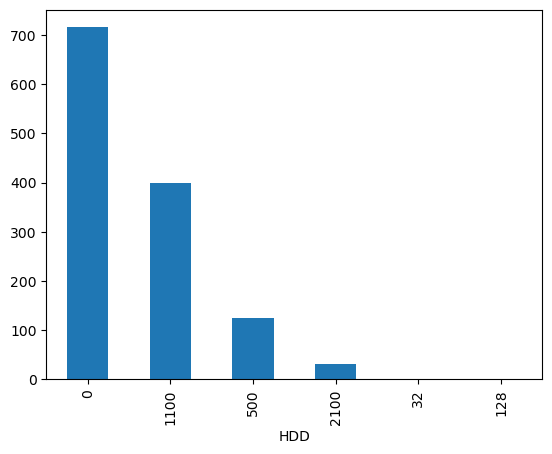

In [185]:
df['HDD'].value_counts().plot(kind = 'bar')

In [166]:
for_corr = df[['Ram','HDD','SSD','Flash Storage','Hybrid','Price']]
for_corr

,Ram,HDD,SSD,Flash Storage,Hybrid,Price
0,8,0,128,0,0,71378.6832
1,8,0,0,128,0,47895.5232
2,8,0,256,0,0,30636.0000
3,16,0,512,0,0,135195.3360
4,8,0,256,0,0,96095.8080
...,...,...,...,...,...,...
1269,4,500,0,0,0,38378.6496
1270,4,0,128,0,0,33992.6400
1271,16,0,512,0,0,79866.7200
1272,2,0,0,64,0,12201.1200


In [168]:
for_corr.corr()['Price']

Ram              0.740106
HDD             -0.094096
SSD              0.673895
Flash Storage   -0.037176
Hybrid           0.022669
Price            1.000000
Name: Price, dtype: float64

In [186]:
df['HDD'] = df['HDD'].astype(np.int32)

<Axes: xlabel='HDD', ylabel='Price'>

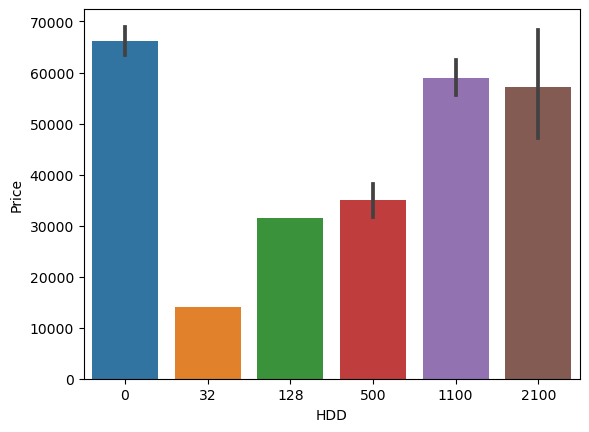

In [171]:
sns.barplot(data = df,x = df['HDD'],y = df['Price'])

In [187]:
df['SSD'] = df['SSD'].astype(np.int32)

<Axes: xlabel='SSD', ylabel='Price'>

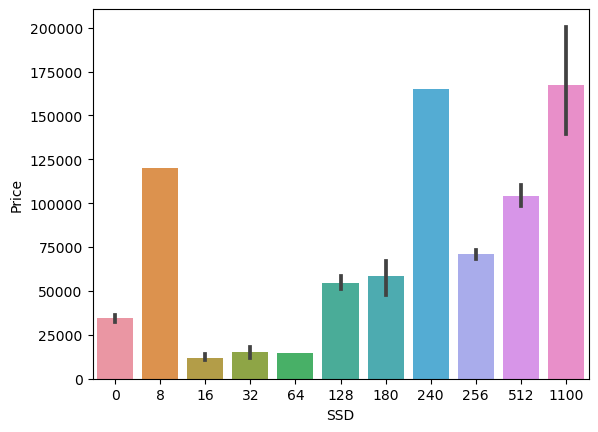

In [173]:
sns.barplot(data = df,x = df['SSD'],y = df['Price'])


In [174]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,IPS,HD,Cpu Brand,HDD,SSD,Flash Storage,Hybrid
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,5,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,5,5,Intel Core i5,0,0,128,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,5,0,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,5,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,5,Intel Core i5,0,256,0,0


In [188]:
df.drop(['Memory'],axis =1,inplace = True)

In [189]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,touchscreen,IPS,HD,Cpu Brand,HDD,SSD,Flash Storage,Hybrid
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,5,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,5,5,Intel Core i5,0,0,128,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,5,0,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,5,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,5,Intel Core i5,0,256,0,0


### lets work on Gpu

In [190]:
gpu_versions = df['Gpu'].value_counts()
gpu_versions.head(60)

Gpu
Intel HD Graphics 620           279
Intel HD Graphics 520           181
Intel UHD Graphics 620           68
Nvidia GeForce GTX 1050          66
Nvidia GeForce GTX 1060          48
Nvidia GeForce 940MX             43
AMD Radeon 530                   41
Intel HD Graphics 500            39
Intel HD Graphics 400            33
Nvidia GeForce GTX 1070          30
Nvidia GeForce GTX 1050 Ti       28
Intel HD Graphics                22
Nvidia GeForce 930MX             20
AMD Radeon R5 M430               20
AMD Radeon 520                   17
Nvidia GeForce MX150             15
AMD Radeon R7 M445               14
Intel HD Graphics 615            14
Nvidia GeForce 920MX             13
Intel HD Graphics 515            13
Nvidia GeForce GTX 960M          12
Intel HD Graphics 505            12
AMD Radeon R5                    11
Nvidia GeForce GTX 980M          10
Nvidia Quadro M1200               9
Intel HD Graphics 405             9
Intel Iris Plus Graphics 640      8
AMD Radeon R5 M420      

#### 1) There are three brands Intel,AMD,Nvidia

#### but there is problem what if there is a company that I haven't seen in gpu

In [191]:
split_gpu = df['Gpu'].str.split()
split_gpu

0       [Intel, Iris, Plus, Graphics, 640]
1              [Intel, HD, Graphics, 6000]
2               [Intel, HD, Graphics, 620]
3                  [AMD, Radeon, Pro, 455]
4       [Intel, Iris, Plus, Graphics, 650]
                       ...                
1269               [Nvidia, GeForce, 920M]
1270            [Intel, HD, Graphics, 520]
1271            [Intel, HD, Graphics, 520]
1272                 [Intel, HD, Graphics]
1273               [AMD, Radeon, R5, M330]
Name: Gpu, Length: 1274, dtype: object

In [192]:
df['Gpu Brand'] = split_gpu.map(lambda row:row[0])
df['Gpu Brand'].value_counts()

Gpu Brand
Intel     703
Nvidia    396
AMD       174
ARM         1
Name: count, dtype: int64

In [193]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,touchscreen,IPS,HD,Cpu Brand,HDD,SSD,Flash Storage,Hybrid,Gpu Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,5,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,5,5,Intel Core i5,0,0,128,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,5,0,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,5,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,5,Intel Core i5,0,256,0,0,Intel


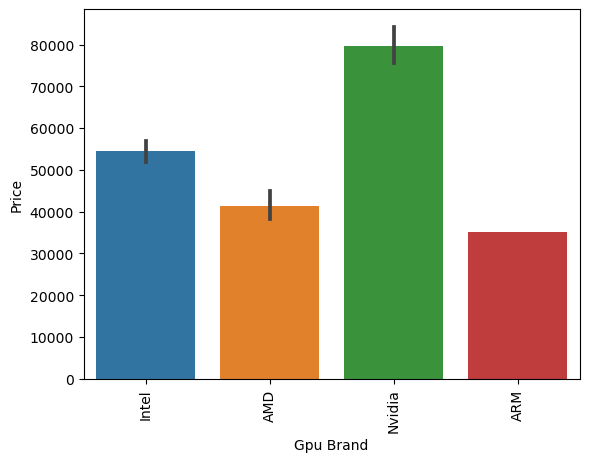

In [211]:
sns.barplot(data = df,x =df['Gpu Brand'],y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [194]:
df = df[df['Gpu Brand']!='ARM']
df

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,touchscreen,IPS,HD,Cpu Brand,HDD,SSD,Flash Storage,Hybrid,Gpu Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,5,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,5,5,Intel Core i5,0,0,128,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,5,0,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,5,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,5,Intel Core i5,0,256,0,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,0,5,5,Intel Core i7,500,0,0,0,Nvidia
1270,Lenovo,2 in 1 Convertible,4,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,0,0,Intel Core i7,0,128,0,0,Intel
1271,Lenovo,2 in 1 Convertible,16,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,0,1,Intel Core i7,0,512,0,0,Intel
1272,Lenovo,Notebook,2,Intel HD Graphics,Windows 10,1.50,12201.1200,0,5,5,others,0,0,64,0,Intel


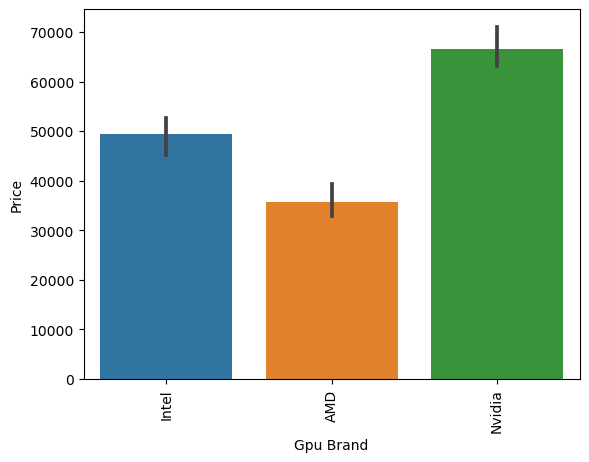

In [294]:
sns.barplot(data = df,x =df['Gpu Brand'],y = df['Price'],estimator = np.median)
plt.xticks(rotation = 'vertical')
plt.show()

#### boxplot

In [298]:
intel_df = df[df['Gpu Brand'] == 'Intel']
intel_df

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,touchscreen,IPS,HD,ppi,Cpu Brand,HDD,SSD,Flash Storage,Hybrid,Gpu Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,5,226.983005,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,5,5,127.677940,Intel Core i5,0,0,128,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,5,0,141.211998,Intel Core i5,0,256,0,0,Intel
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,5,226.983005,Intel Core i5,0,256,0,0,Intel
6,Apple,Ultrabook,16,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,0,1,5,220.534624,Intel Core i7,0,0,256,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,Dell,Notebook,2,Intel HD Graphics,Windows 10,2.20,20193.1200,0,5,5,100.454670,others,500,0,0,0,Intel
1268,HP,Netbook,2,Intel HD Graphics 400,Windows 10,1.17,11135.5200,0,5,5,135.094211,others,0,0,32,0,Intel
1270,Lenovo,2 in 1 Convertible,4,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,0,0,157.350512,Intel Core i7,0,128,0,0,Intel
1271,Lenovo,2 in 1 Convertible,16,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,0,1,276.053530,Intel Core i7,0,512,0,0,Intel


<Axes: xlabel='Gpu Brand', ylabel='Price'>

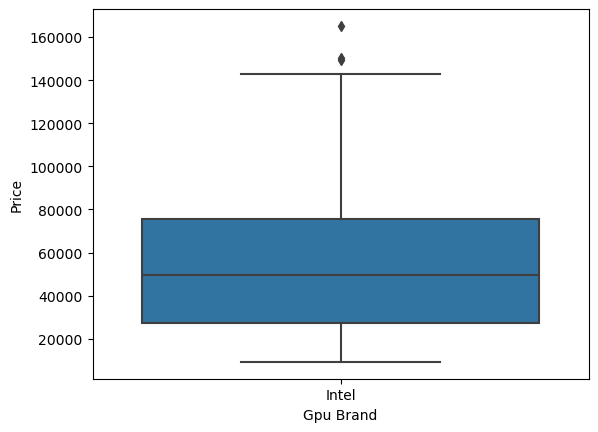

In [299]:
sns.boxplot(data = intel_df,x = intel_df['Gpu Brand'],y = intel_df['Price'])

In [300]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,touchscreen,IPS,HD,ppi,Cpu Brand,HDD,SSD,Flash Storage,Hybrid,Gpu Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,5,226.983005,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,5,5,127.677940,Intel Core i5,0,0,128,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,5,0,141.211998,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,5,220.534624,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,5,226.983005,Intel Core i5,0,256,0,0,Intel


In [195]:
df = df.drop('Gpu',axis = 1)

In [196]:
df

,Company,TypeName,Ram,OpSys,Weight,Price,touchscreen,IPS,HD,Cpu Brand,HDD,SSD,Flash Storage,Hybrid,Gpu Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,5,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,5,5,Intel Core i5,0,0,128,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,5,0,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,5,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,5,Intel Core i5,0,256,0,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,Windows 10,2.20,38378.6496,0,5,5,Intel Core i7,500,0,0,0,Nvidia
1270,Lenovo,2 in 1 Convertible,4,Windows 10,1.80,33992.6400,1,0,0,Intel Core i7,0,128,0,0,Intel
1271,Lenovo,2 in 1 Convertible,16,Windows 10,1.30,79866.7200,1,0,1,Intel Core i7,0,512,0,0,Intel
1272,Lenovo,Notebook,2,Windows 10,1.50,12201.1200,0,5,5,others,0,0,64,0,Intel


In [197]:
df['OpSys'].value_counts()

OpSys
Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

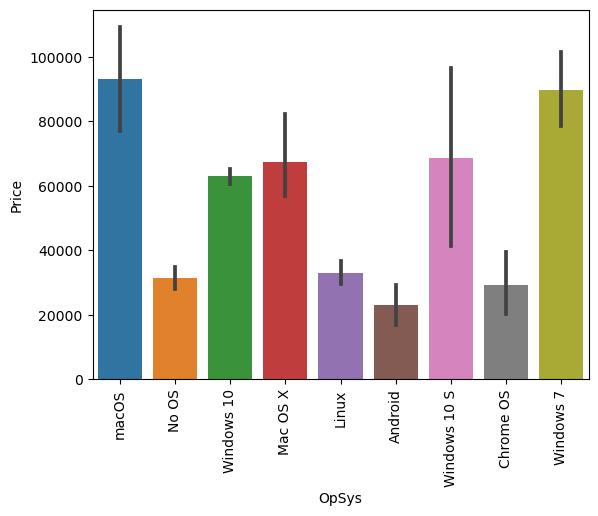

In [309]:
sns.barplot(data = df,x =df['OpSys'],y = df['Price'])#,estimator = np.median)
plt.xticks(rotation = 'vertical')
plt.show()

In [198]:
def os_comp(row):
    if 'Windows 10' in row or 'Windows 7' in row  or 'Windows 10 S' in row:
        return 'Windows'
    elif 'macOS' in row or 'Mac OS X' in row:
        return 'Mac'
    else:
        return 'other/linux/android'


In [199]:
df['OS'] = df['OpSys'].map(lambda row: os_comp(row) )

In [200]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,touchscreen,IPS,HD,Cpu Brand,HDD,SSD,Flash Storage,Hybrid,Gpu Brand,OS
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,5,Intel Core i5,0,128,0,0,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,5,5,Intel Core i5,0,0,128,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,5,0,Intel Core i5,0,256,0,0,Intel,other/linux/android
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,5,Intel Core i7,0,512,0,0,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,5,Intel Core i5,0,256,0,0,Intel,Mac


<Axes: xlabel='OS'>

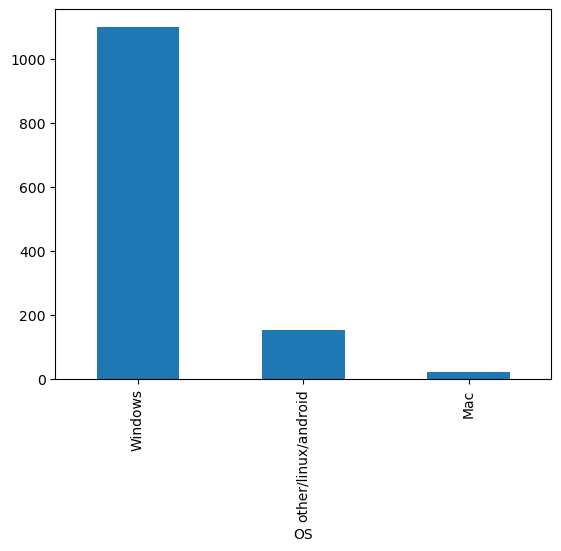

In [321]:
df['OS'].value_counts().plot(kind = 'bar')

<Axes: xlabel='OS', ylabel='Price'>

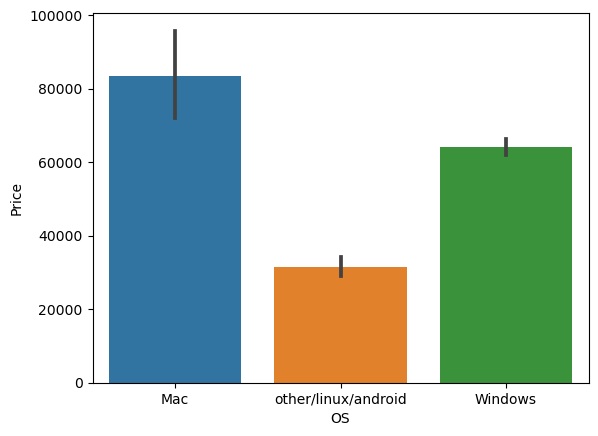

In [322]:
sns.barplot(data = df ,x =df['OS'],y = df['Price'])

In [201]:
df.drop(['OpSys'],axis = 1 ,inplace = True)

In [202]:
df.sample(5)

,Company,TypeName,Ram,Weight,Price,touchscreen,IPS,HD,Cpu Brand,HDD,SSD,Flash Storage,Hybrid,Gpu Brand,OS
850,HP,Notebook,4,1.86,15930.72,0,5,5,others,0,128,0,0,Intel,other/linux/android
523,HP,Notebook,4,1.63,36709.92,0,5,5,Intel Core i3,0,128,0,0,Intel,Windows
1248,Lenovo,Notebook,8,2.30,30529.44,0,0,0,Intel Core i5,0,256,0,0,Intel,other/linux/android
1107,Lenovo,2 in 1 Convertible,4,2.10,46193.76,1,0,0,Intel Core i5,0,256,0,0,Intel,Windows
673,Lenovo,Notebook,4,2.20,18594.72,0,5,5,AMD,0,128,0,0,AMD,Windows


In [308]:
df['Weight']

0       1.37
1       1.34
2       1.86
3       1.83
4       1.37
        ... 
1269    2.20
1270    1.80
1271    1.30
1272    1.50
1273    2.19
Name: Weight, Length: 1273, dtype: float32

F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Weight', ylabel='Count'>

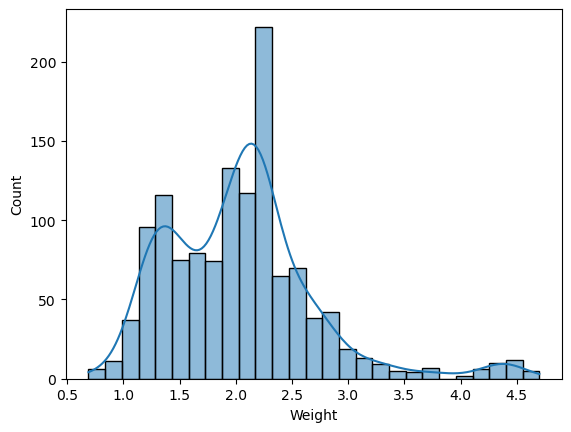

In [312]:
sns.histplot(df['Weight'],kde = True)

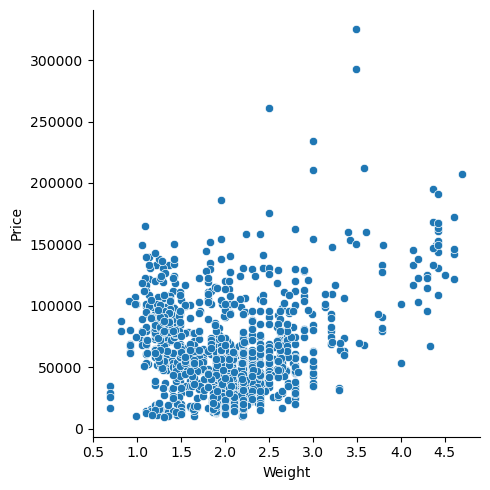

In [310]:
sns.relplot(data = df ,x = df['Weight'],y = df['Price'],kind = 'scatter')

F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Weight', ylabel='Price'>

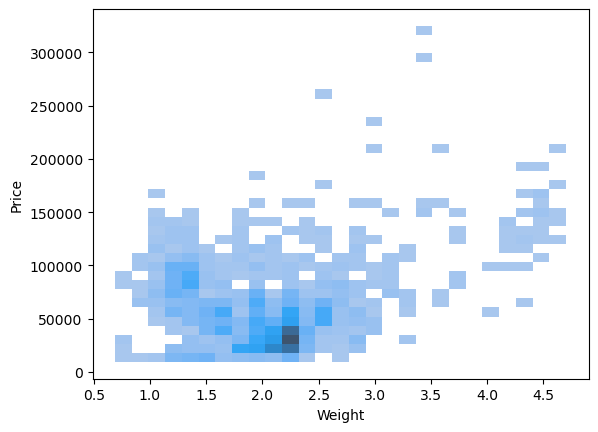

In [311]:
sns.histplot(data = df ,x = df['Weight'],y = df['Price'])

In [325]:
df.head()

,Company,TypeName,Ram,Weight,Price,touchscreen,IPS,HD,ppi,Cpu Brand,HDD,SSD,Flash Storage,Hybrid,Gpu Brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,5,226.983005,Intel Core i5,0,128,0,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,5,5,127.677940,Intel Core i5,0,0,128,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,5,0,141.211998,Intel Core i5,0,256,0,0,Intel,other/linux/android
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,5,220.534624,Intel Core i7,0,512,0,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,5,226.983005,Intel Core i5,0,256,0,0,Intel,Mac


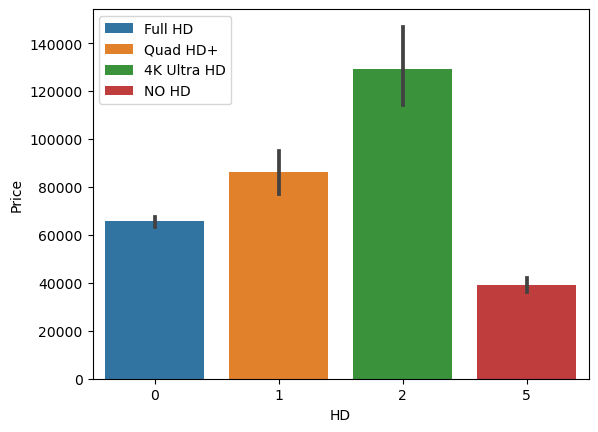

In [327]:
sns.barplot(data =df,x = df['HD'] ,y= df['Price'],label =['Full HD','Quad HD+','4K Ultra HD','NO HD'] )
plt.legend(loc = 'best')
plt.show()



#### focussing on target column

In [333]:
numeric_df = df[['Ram','Weight','Price','touchscreen','IPS','HD','ppi','HDD','SSD','Flash Storage','Hybrid']]
numeric_df

,Ram,Weight,Price,touchscreen,IPS,HD,ppi,HDD,SSD,Flash Storage,Hybrid
0,8,1.37,71378.6832,0,1,5,226.983005,0,128,0,0
1,8,1.34,47895.5232,0,5,5,127.677940,0,0,128,0
2,8,1.86,30636.0000,0,5,0,141.211998,0,256,0,0
3,16,1.83,135195.3360,0,1,5,220.534624,0,512,0,0
4,8,1.37,96095.8080,0,1,5,226.983005,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1269,4,2.20,38378.6496,0,5,5,100.454670,500,0,0,0
1270,4,1.80,33992.6400,1,0,0,157.350512,0,128,0,0
1271,16,1.30,79866.7200,1,0,1,276.053530,0,512,0,0
1272,2,1.50,12201.1200,0,5,5,111.935204,0,0,64,0


In [338]:
corr_ = numeric_df.corr()
corr_

,Ram,Weight,Price,touchscreen,IPS,HD,ppi,HDD,SSD,Flash Storage,Hybrid
Ram,1.000000,0.389134,0.739996,0.113316,-0.202951,-0.300096,0.294927,0.105100,0.600589,-0.055956,0.050769
Weight,0.389134,1.000000,0.211667,-0.292288,-0.030513,-0.125716,-0.319499,0.517621,-0.052617,-0.176381,0.105617
Price,0.739996,0.211667,1.000000,0.190382,-0.249143,-0.309190,0.471481,-0.094563,0.673748,-0.036712,0.022626
touchscreen,0.113316,-0.292288,0.190382,1.000000,-0.140606,0.001681,0.452107,-0.204198,0.250874,-0.019146,-0.036393
IPS,-0.202951,-0.030513,-0.249143,-0.140606,1.000000,0.234592,-0.279960,0.080497,-0.216500,-0.052711,0.012927
HD,-0.300096,-0.125716,-0.309190,0.001681,0.234592,1.000000,-0.241599,0.015061,-0.305247,0.164735,-0.050376
ppi,0.294927,-0.319499,0.471481,0.452107,-0.279960,-0.241599,1.000000,-0.288384,0.505295,0.079691,-0.020645
HDD,0.105100,0.517621,-0.094563,-0.204198,0.080497,0.015061,-0.288384,1.000000,-0.386502,-0.117272,-0.069890
SSD,0.600589,-0.052617,0.673748,0.250874,-0.216500,-0.305247,0.505295,-0.386502,1.000000,-0.144402,-0.048564
Flash Storage,-0.055956,-0.176381,-0.036712,-0.019146,-0.052711,0.164735,0.079691,-0.117272,-0.144402,1.000000,-0.012907


<Axes: >

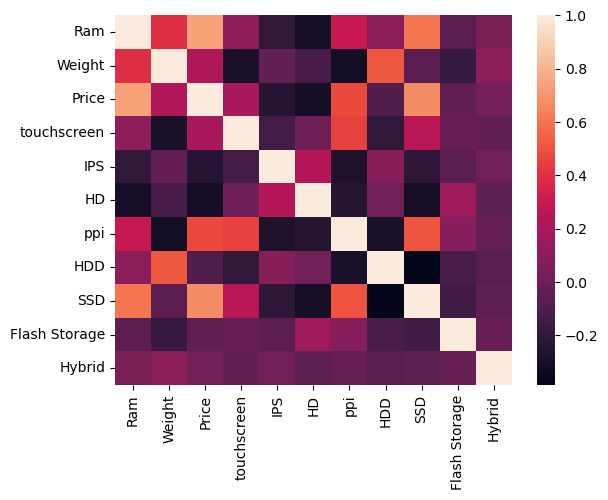

In [340]:
sns.heatmap(corr_)

#  I AM NOT GETTING ANY IDEA 

## white b/w different cols  is red flag 

F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Count'>

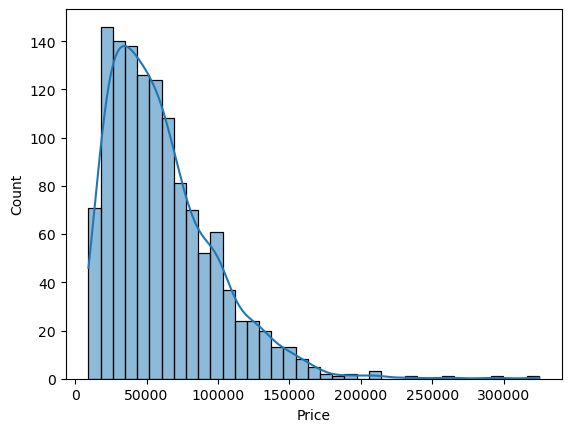

In [343]:
sns.histplot(df['Price'],kde = True)

### Price (target col) is skewed right
#### apply log transform

F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Count'>

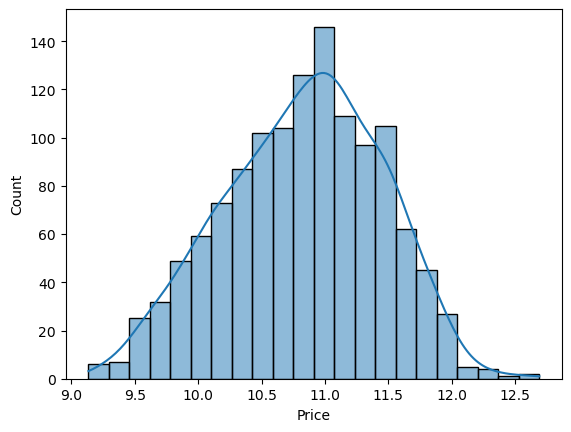

In [344]:
sns.histplot(np.log(df['Price']),kde = True)

In [346]:
df.head()

,Company,TypeName,Ram,Weight,Price,touchscreen,IPS,HD,ppi,Cpu Brand,HDD,SSD,Flash Storage,Hybrid,Gpu Brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,5,226.983005,Intel Core i5,0,128,0,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,5,5,127.677940,Intel Core i5,0,0,128,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,5,0,141.211998,Intel Core i5,0,256,0,0,Intel,other/linux/android
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,5,220.534624,Intel Core i7,0,512,0,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,5,226.983005,Intel Core i5,0,256,0,0,Intel,Mac


In [347]:
df['Company'].value_counts()

Company
Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

### NOW STARTS THE REAL ML

### encode the company col  

In [206]:
df['Company'].value_counts()

Company
Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [207]:
counts = df['Company'].value_counts()
counts

Company
Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [208]:
brand_low = counts[counts<20].index
brand_low

Index(['Samsung', 'Razer', 'Mediacom', 'Microsoft', 'Xiaomi', 'Vero', 'Chuwi',
       'Google', 'Fujitsu', 'LG', 'Huawei'],
      dtype='object', name='Company')

### lets work on df['Company']

In [86]:
from sklearn.preprocessing import OneHotEncoder

In [99]:
only_brands = df['Company'].copy()

In [100]:
only_brands

0        Apple
1        Apple
2           HP
3        Apple
4        Apple
         ...  
1269      Asus
1270    Lenovo
1271    Lenovo
1272    Lenovo
1273        HP
Name: Company, Length: 1273, dtype: object

In [101]:
only_brands.replace(brand_low,'jusss')

0        Apple
1        Apple
2           HP
3        Apple
4        Apple
         ...  
1269      Asus
1270    Lenovo
1271    Lenovo
1272    Lenovo
1273        HP
Name: Company, Length: 1273, dtype: object

In [109]:
ohe = OneHotEncoder(sparse = False,drop = 'first')

In [110]:
only_brands_encoded = ohe.fit_transform(only_brands.replace(brand_low,'uncommon').values.reshape(-1,1))

F:\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [111]:
only_br_enc = pd.DataFrame(only_brands_encoded)
only_br_enc

,0,1,2,3,4,5,6,7
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1268,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1269,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1270,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1271,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [368]:
df['TypeName'].value_counts()

TypeName
Notebook              706
Gaming                205
Ultrabook             194
2 in 1 Convertible    116
Workstation            29
Netbook                23
Name: count, dtype: int64

In [112]:
from sklearn.compose import ColumnTransformer

In [113]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline,Pipeline

In [242]:
counts = df['Company'].value_counts()
counts

Company
Dell        291
Lenovo      289
HP          268
Asus        151
Acer        101
MSI          54
uncommon     50
Toshiba      48
Apple        21
Name: count, dtype: int64

In [244]:
# lower = counts<

Series([], Name: count, dtype: int64)

In [224]:
# df['Company']= df['Company'].replace(low_count_comp,'uncommon')


In [233]:
df.sample(5)

,Company,TypeName,Ram,Weight,Price,touchscreen,IPS,HD,Cpu Brand,HDD,SSD,Flash Storage,Hybrid,Gpu Brand,OS
458,uncommon,Ultrabook,8,1.25,95850.7200,1,5,5,Intel Core i7,0,256,0,0,Intel,Windows
936,Dell,Notebook,4,2.18,29762.2080,0,5,5,Intel Core i3,1100,0,0,0,Intel,Windows
1236,HP,Ultrabook,8,1.54,117119.5632,0,5,5,Intel Core i7,0,256,0,0,Intel,Windows
335,HP,Notebook,8,1.48,67559.0400,0,5,0,Intel Core i5,0,256,0,0,Intel,Windows
452,HP,Workstation,8,2.31,81731.5200,0,0,0,Intel Core i7,0,512,0,0,Intel,Windows


In [238]:
X = df.drop('Price',axis =1)
X.sample(5)

,Company,TypeName,Ram,Weight,touchscreen,IPS,HD,Cpu Brand,HDD,SSD,Flash Storage,Hybrid,Gpu Brand,OS
1186,Dell,2 in 1 Convertible,16,2.09,1,5,0,Intel Core i7,0,512,0,0,Intel,Windows
149,Acer,Notebook,4,2.10,0,5,5,Intel Core i3,1100,0,0,0,Intel,Windows
816,uncommon,Ultrabook,16,1.29,1,0,2,Intel Core i7,0,512,0,0,Intel,Windows
1020,Dell,2 in 1 Convertible,4,2.08,1,0,0,Intel Core i3,1100,0,0,0,Intel,Windows
1169,MSI,Gaming,8,2.20,0,0,0,Intel Core i7,1100,0,0,0,Nvidia,Windows


In [237]:
y = np.log(df['Price'])
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1269    10.555257
1270    10.433899
1271    11.288115
1272     9.409283
1273    10.614129
Name: Price, Length: 1273, dtype: float64

In [239]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 13)

In [263]:
X_train = X_train.drop(['Flash Storage','Hybrid'],axis =1)
X_train

,Company,TypeName,Ram,Weight,touchscreen,IPS,HD,Cpu Brand,HDD,SSD,Gpu Brand,OS
1161,MSI,Gaming,16,1.70,0,5,0,Intel Core i7,1100,256,Nvidia,Windows
934,Toshiba,Notebook,4,1.47,0,0,0,Intel Core i5,0,128,Intel,Windows
63,Asus,Notebook,8,1.40,0,5,0,Intel Core i5,0,256,Intel,Windows
46,Lenovo,Notebook,4,2.20,0,5,5,Intel Core i3,0,128,Intel,other/linux/android
346,HP,Notebook,2,1.44,0,5,5,others,0,0,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
866,Toshiba,Ultrabook,8,1.20,0,5,5,Intel Core i5,0,256,Intel,Windows
742,Toshiba,Notebook,8,1.25,1,0,0,Intel Core i5,0,256,Intel,Windows
74,Acer,Notebook,8,2.10,0,5,5,Intel Core i3,1100,0,Intel,Windows
176,Acer,Notebook,4,2.10,0,5,5,Intel Core i3,0,128,Intel,Windows


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1273 non-null   object 
 1   TypeName       1273 non-null   object 
 2   Ram            1273 non-null   int32  
 3   Weight         1273 non-null   float32
 4   Price          1273 non-null   float64
 5   touchscreen    1273 non-null   int64  
 6   IPS            1273 non-null   int32  
 7   HD             1273 non-null   int64  
 8   Cpu Brand      1273 non-null   object 
 9   HDD            1273 non-null   int32  
 10  SSD            1273 non-null   int32  
 11  Flash Storage  1273 non-null   object 
 12  Hybrid         1273 non-null   object 
 13  Gpu Brand      1273 non-null   object 
 14  OS             1273 non-null   object 
dtypes: float32(1), float64(1), int32(4), int64(2), object(7)
memory usage: 134.3+ KB


In [266]:
X_test

,Company,TypeName,Ram,Weight,touchscreen,IPS,HD,Cpu Brand,HDD,SSD,Gpu Brand,OS
364,Lenovo,Notebook,8,2.20,0,5,5,Intel Core i3,0,256,Nvidia,other/linux/android
1130,HP,Notebook,8,2.04,0,5,5,Intel Core i7,2100,0,Intel,Windows
505,Lenovo,Notebook,8,1.44,0,5,0,Intel Core i5,0,256,Intel,Windows
1066,Asus,Gaming,64,3.58,0,0,0,Intel Core i7,0,1100,Nvidia,Windows
109,Lenovo,Notebook,8,1.58,0,0,0,Intel Core i7,0,256,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
1082,Lenovo,2 in 1 Convertible,4,0.69,1,0,5,others,0,0,Intel,Windows
1212,MSI,Gaming,16,2.43,0,0,0,Intel Core i7,1100,256,Nvidia,Windows
48,Dell,Notebook,4,2.30,0,5,0,Intel Core i5,0,256,AMD,Windows
986,HP,Notebook,8,2.04,0,5,0,Intel Core i5,1100,0,Intel,Windows


In [254]:
X_train.shape

(1018, 14)

In [267]:
from sklearn.linear_model import LinearRegression

### putting into pipeline  .. the blocks connect the process

In [271]:
block1 = ColumnTransformer([('enc1',OneHotEncoder(sparse = True,drop = 'first'),[0,1,7,10,11])],remainder = 'passthrough') 

block2 = LinearRegression()


In [272]:
pipe = make_pipeline(block1,block2)

In [273]:
pipe.fit(X_train,y_train)

F:\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('enc1',
                                                  OneHotEncoder(drop='first',
                                                                sparse=True),
                                                  [0, 1, 7, 10, 11])])),
                ('linearregression', LinearRegression())])

In [274]:
y_pred = pipe.predict(X_test)

In [277]:
from sklearn.metrics import r2_score

In [278]:
r2_score(y_test,y_pred)

0.78500006348807

#### In future I will update my code as I would learn new stuffs..